In [ ]:
import pandas as pd 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("city_day.csv")
print(Counter(data['City']))
data_delhi=data.loc[data['City']=='Delhi']
data_bangalore=data.loc[data['City']=='Bengaluru']


Counter({'Ahmedabad': 2009, 'Bengaluru': 2009, 'Chennai': 2009, 'Delhi': 2009, 'Lucknow': 2009, 'Mumbai': 2009, 'Hyderabad': 2006, 'Patna': 1858, 'Gurugram': 1679, 'Visakhapatnam': 1462, 'Amritsar': 1221, 'Jorapokhar': 1169, 'Jaipur': 1114, 'Thiruvananthapuram': 1112, 'Amaravati': 951, 'Brajrajnagar': 938, 'Talcher': 925, 'Kolkata': 814, 'Guwahati': 502, 'Coimbatore': 386, 'Shillong': 310, 'Chandigarh': 304, 'Bhopal': 289, 'Ernakulam': 162, 'Kochi': 162, 'Aizawl': 113})


In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 10229 to 12237
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       2007 non-null   float64
 3   PM10        1932 non-null   float64
 4   NO          2007 non-null   float64
 5   NO2         2007 non-null   float64
 6   NOx         2009 non-null   float64
 7   NH3         2000 non-null   float64
 8   CO          2009 non-null   float64
 9   SO2         1899 non-null   float64
 10  O3          1925 non-null   float64
 11  Benzene     2009 non-null   float64
 12  Toluene     2009 non-null   float64
 13  Xylene      1228 non-null   float64
 14  AQI         1999 non-null   float64
 15  AQI_Bucket  1999 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


In [ ]:
data_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 4294 to 6302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       1863 non-null   float64
 3   PM10        1649 non-null   float64
 4   NO          2003 non-null   float64
 5   NO2         2003 non-null   float64
 6   NOx         2005 non-null   float64
 7   NH3         1806 non-null   float64
 8   CO          1998 non-null   float64
 9   SO2         2003 non-null   float64
 10  O3          1865 non-null   float64
 11  Benzene     1743 non-null   float64
 12  Toluene     1916 non-null   float64
 13  Xylene      0 non-null      float64
 14  AQI         1910 non-null   float64
 15  AQI_Bucket  1910 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


In [ ]:
data_delhi.drop(["Benzene", "Toluene", "Xylene", "AQI_Bucket", "City"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_delhi["Date"] = pd.to_datetime(data_delhi["Date"], format="%Y-%m-%d", errors="coerce")
assert data_delhi["Date"].dtype == "datetime64[ns]"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi.set_index("Date", inplace=True)

In [ ]:
data_delhi

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-01-01  313.22  607.98  69.16  36.39  ...  15.20   9.25  41.68  472.0
2015-01-02  186.18  269.55  62.09  32.87  ...   9.54   6.65  29.97  454.0
2015-01-03   87.18  131.90  25.73  30.31  ...  10.61   2.65  19.71  143.0
2015-01-04  151.84  241.84  25.01  36.91  ...  11.54   4.63  25.36  319.0
2015-01-05  146.60  219.13  14.01  34.92  ...   9.20   3.33  23.20  325.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2020-06-27   39.80  155.94  10.88  21.46  ...   0.87  10.38  18.88  112.0
2020-06-28   59.52  308.65  12.67  21.60  ...   0.94  10.70  18.05  196.0
2020-06-29   44.86  184.12  10.50  21.57  ...   0.88  11.58  26.61  233.0
2020-06-30   39.80   91.98   5.99  17.96  ...   0.84  10.51  37.29  114.0
2020-07-01   54.01  128.66   6.33  21.05  ...   0.97  11.15  29.73  101.0

[2009 rows x 10 columns]

In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2007 non-null   float64
 1   PM10    1932 non-null   float64
 2   NO      2007 non-null   float64
 3   NO2     2007 non-null   float64
 4   NOx     2009 non-null   float64
 5   NH3     2000 non-null   float64
 6   CO      2009 non-null   float64
 7   SO2     1899 non-null   float64
 8   O3      1925 non-null   float64
 9   AQI     1999 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


#Imputation of Missing Values

In [ ]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

In [ ]:
# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_delhi))], size=200)
clone = data_delhi.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices, 0] = np.nan

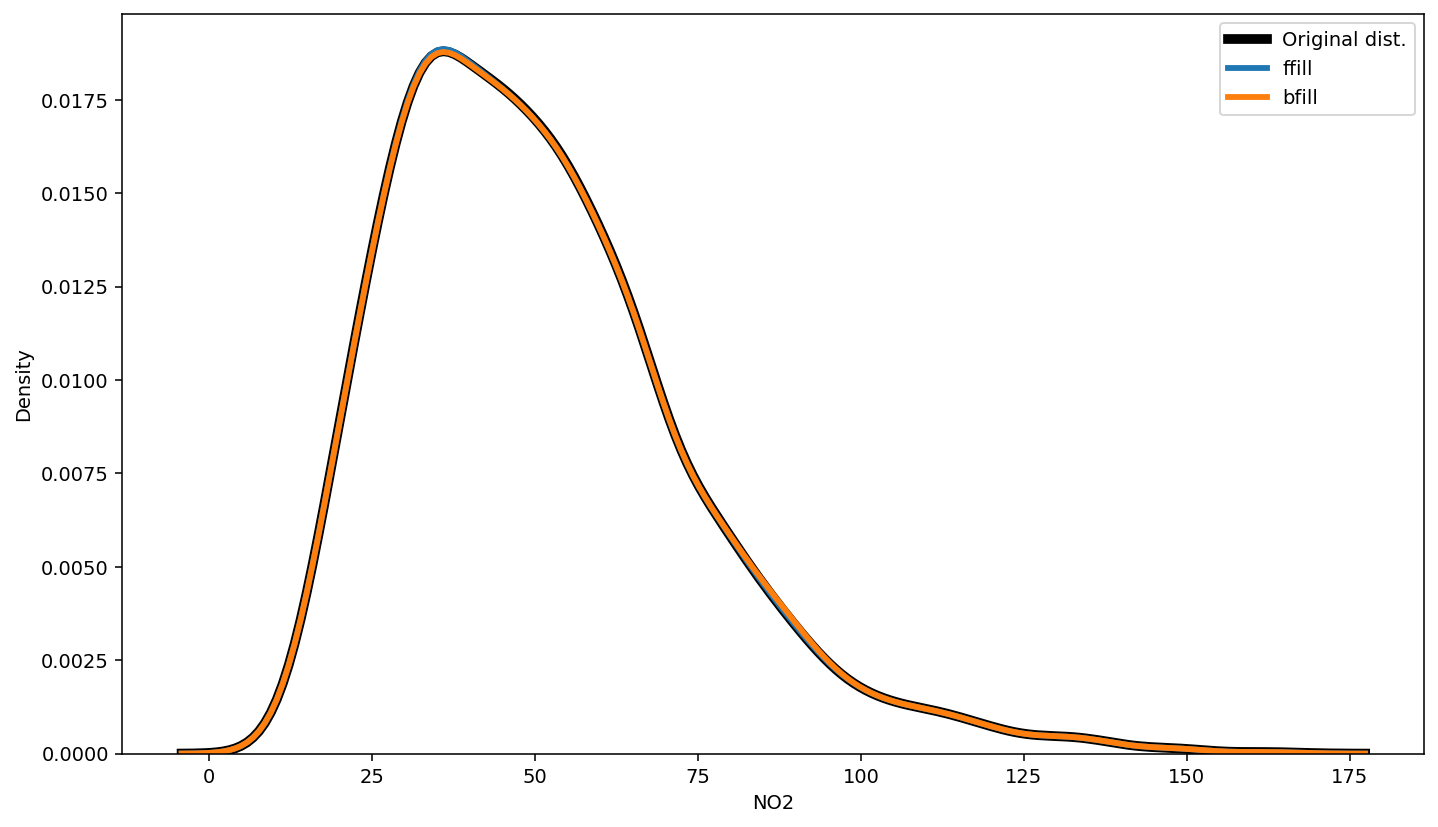

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO2'].{method}()")

compare_dists(data_delhi["NO2"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['NO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


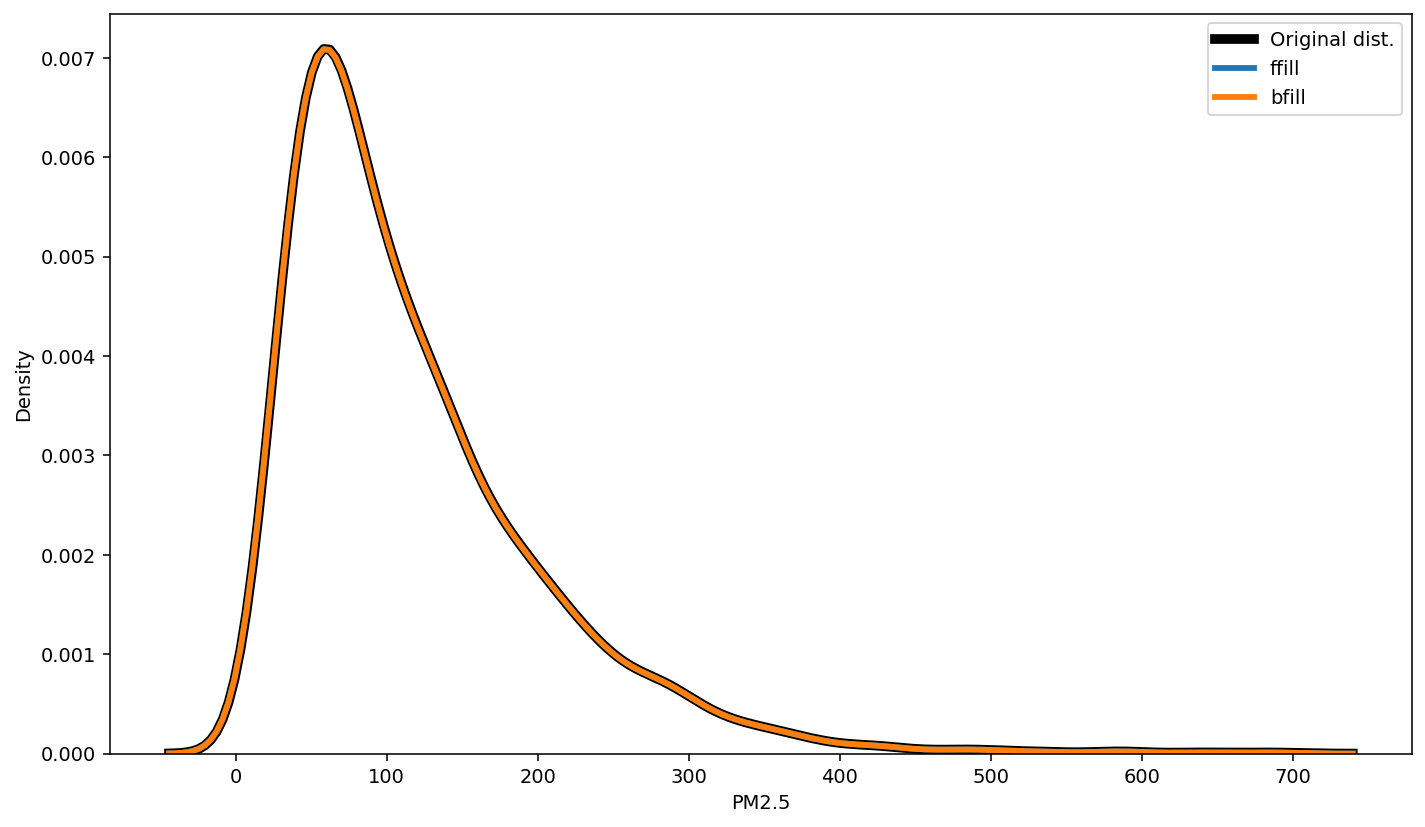

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM2.5'].{method}()")

compare_dists(data_delhi["PM2.5"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['PM2.5']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


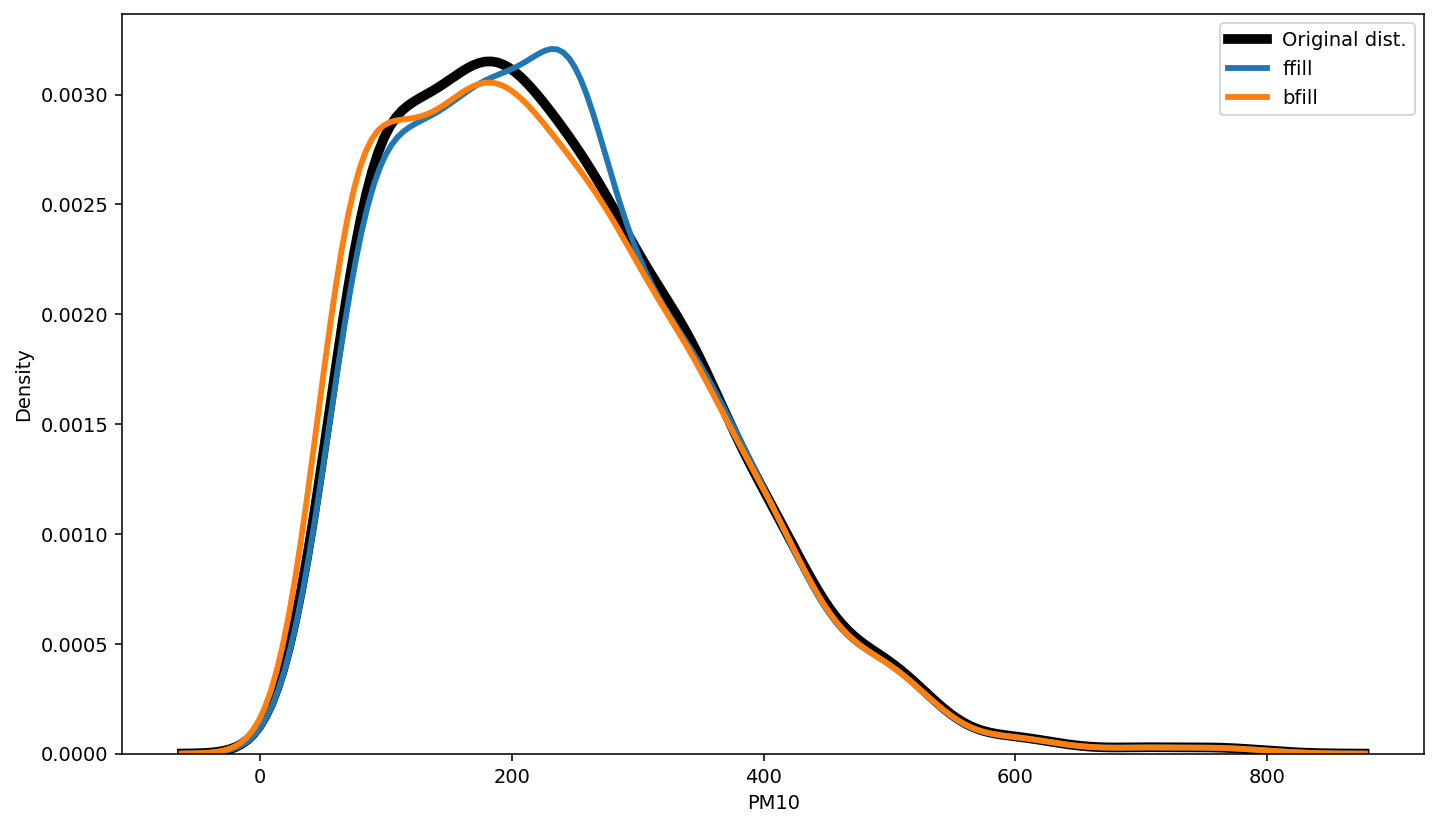

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM10'].{method}()")

compare_dists(data_delhi["PM10"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['PM10']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


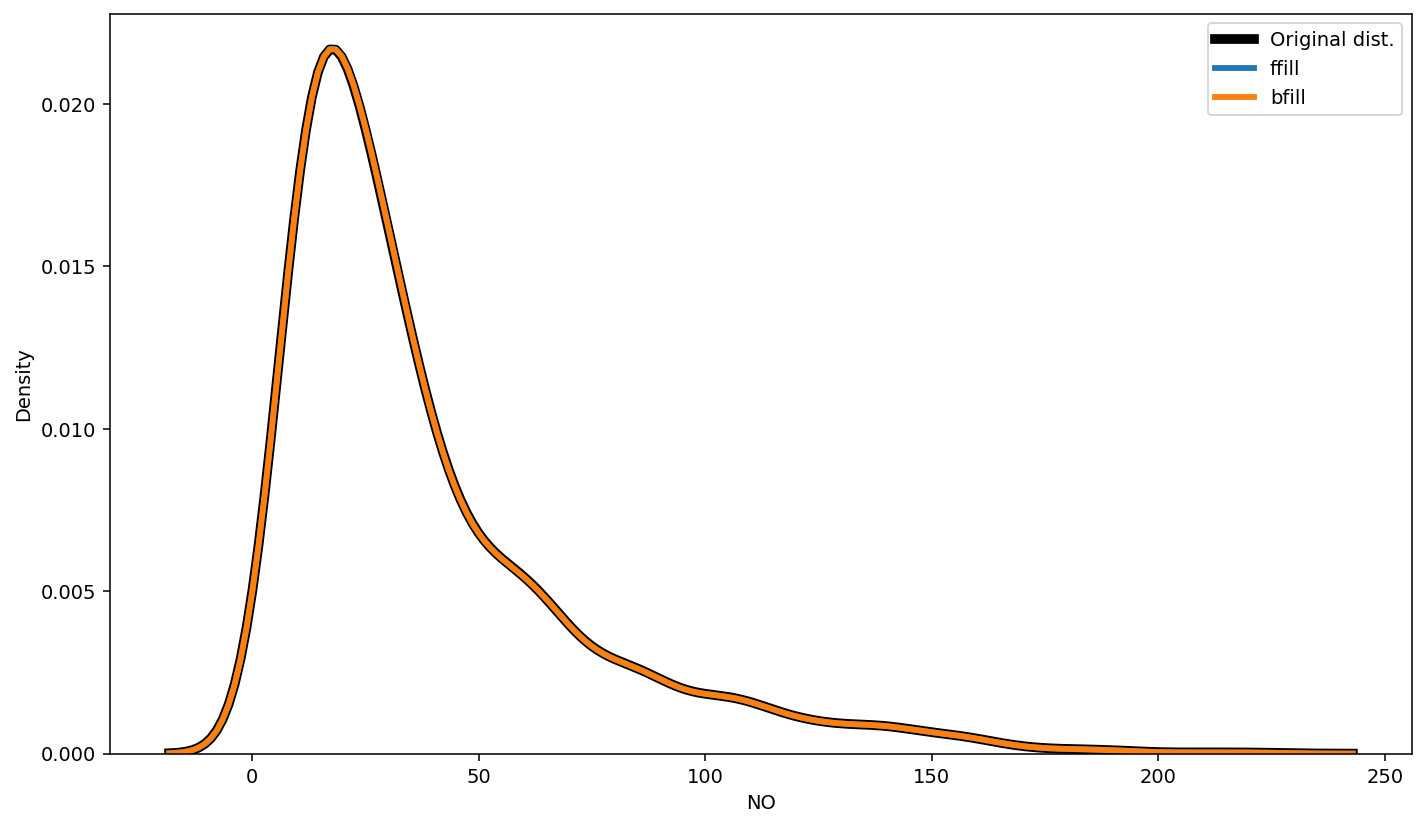

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO'].{method}()")

compare_dists(data_delhi["NO"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['NO']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


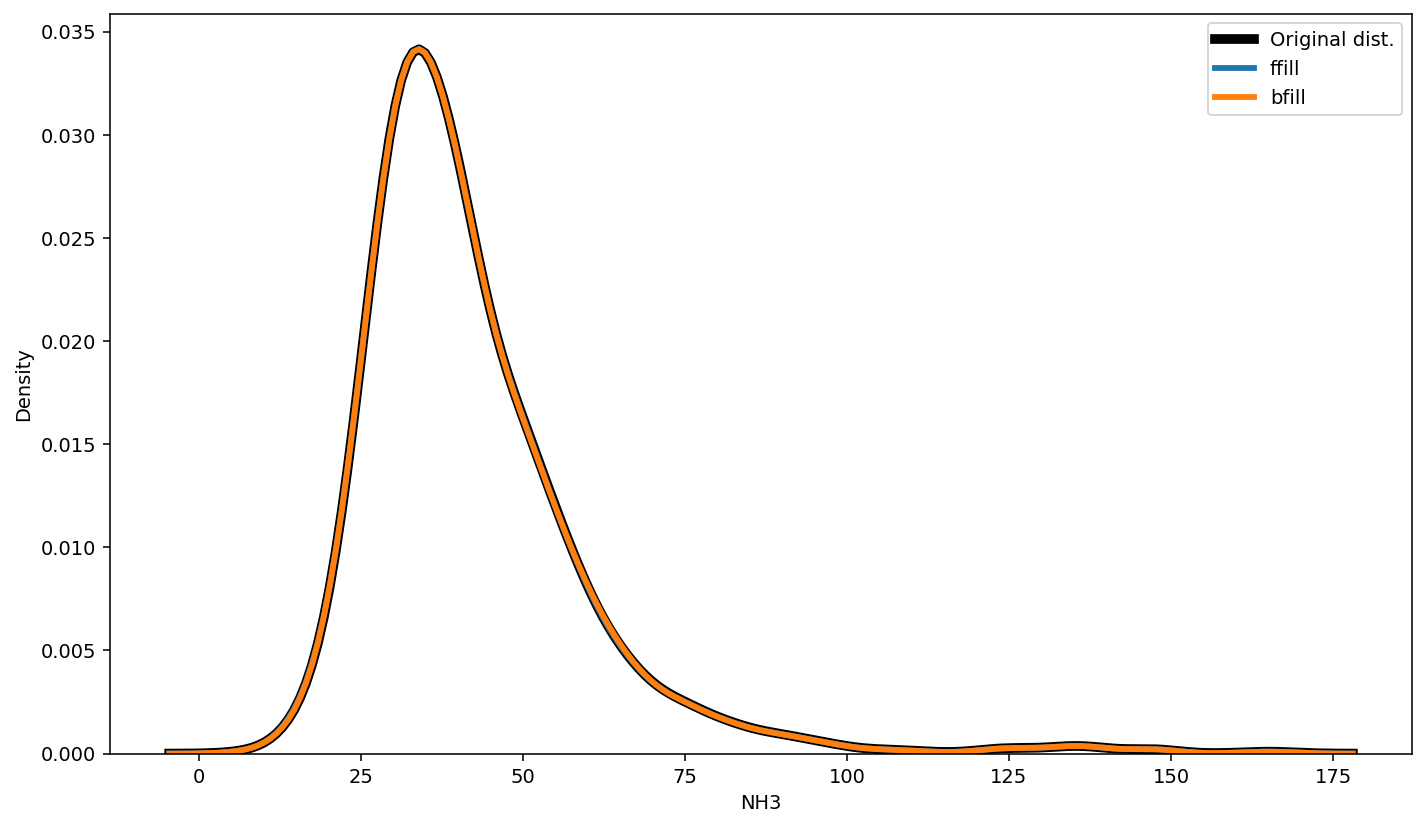

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NH3'].{method}()")

compare_dists(data_delhi["NH3"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['NH3']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


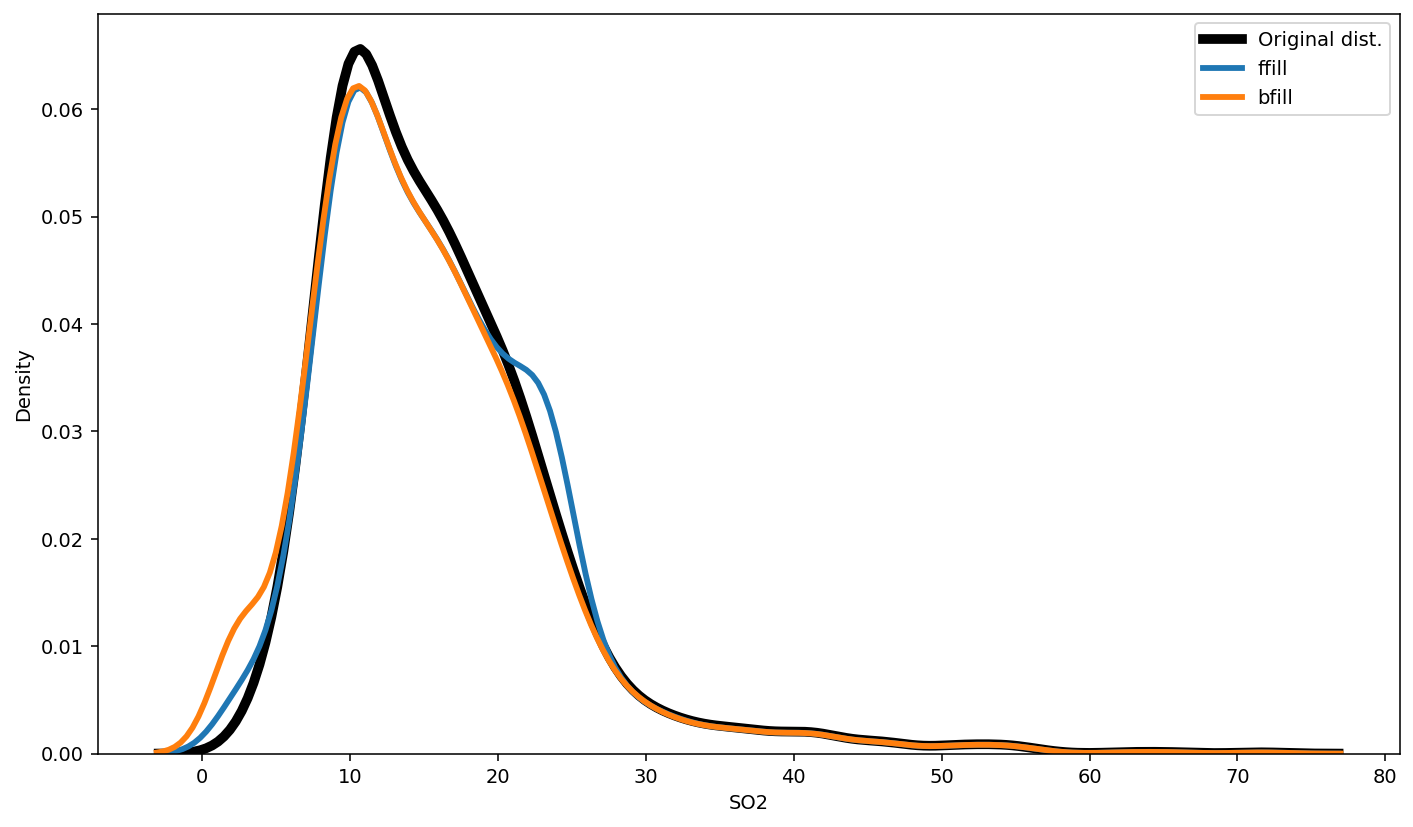

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['SO2'].{method}()")

compare_dists(data_delhi["SO2"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['SO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


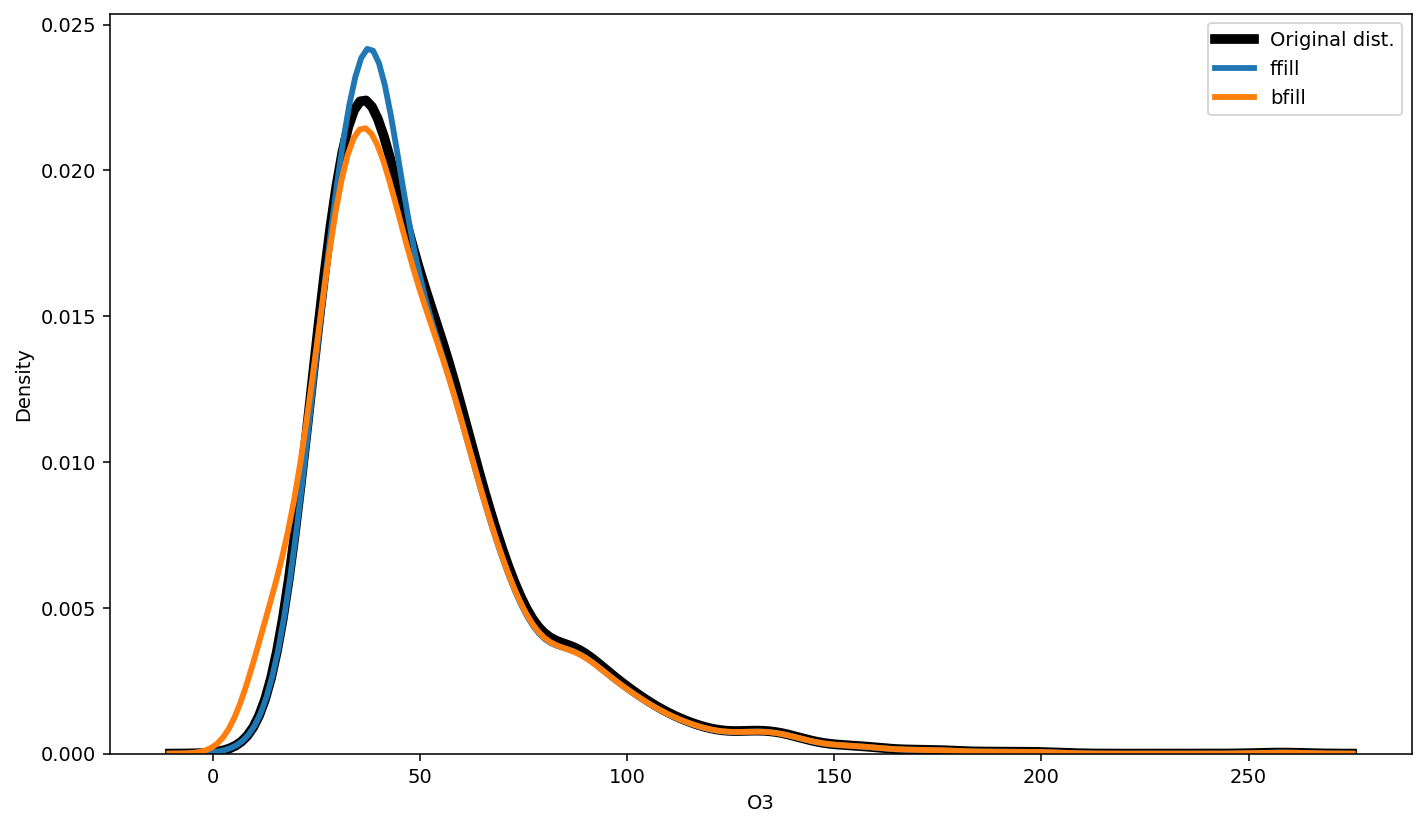

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['O3'].{method}()")

compare_dists(data_delhi["O3"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['O3']=clone2['ffill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


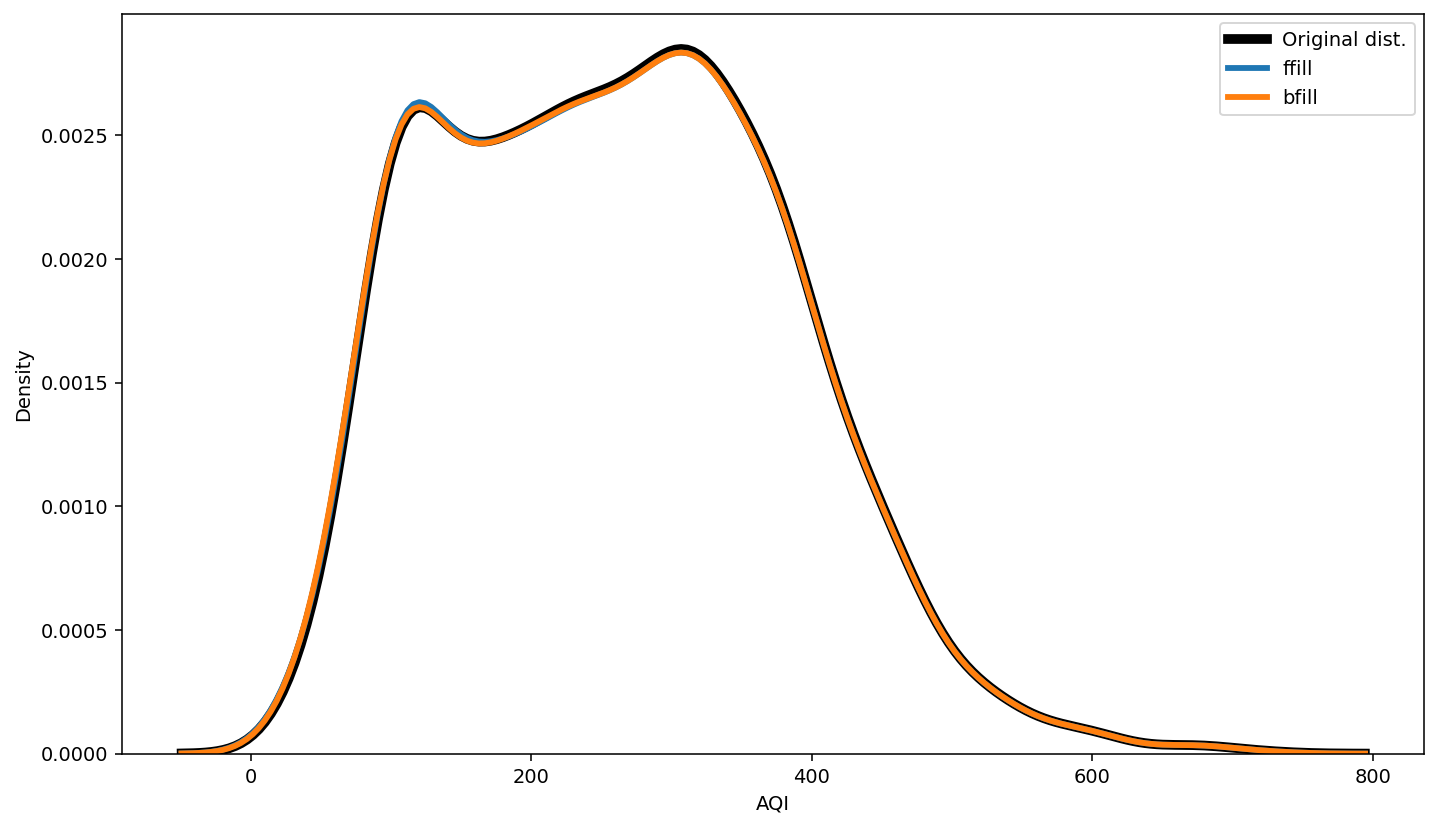

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['AQI'].{method}()")

compare_dists(data_delhi["AQI"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['AQI']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2009 non-null   float64
 1   PM10    2009 non-null   float64
 2   NO      2009 non-null   float64
 3   NO2     2009 non-null   float64
 4   NOx     2009 non-null   float64
 5   NH3     2009 non-null   float64
 6   CO      2009 non-null   float64
 7   SO2     2009 non-null   float64
 8   O3      2009 non-null   float64
 9   AQI     2009 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


In [ ]:
data_month=data_delhi.resample("M").mean()

In [ ]:
data_month

PM2.5        PM10          NO         NO2         NOx  \
Date                                                                     
2015-01-31  175.690645  276.971290   26.392581   36.925484   51.794194   
2015-02-28  153.920357  234.939643   29.287857   41.656786   54.208571   
2015-03-31   80.338065  135.044516   15.010000   24.386129   30.734194   
2015-04-30   91.562333  187.991333   18.510667   44.279667   54.751000   
2015-05-31   97.109355  271.050645   30.833871   61.483548   78.628065   
2015-06-30   85.777000  185.109667   19.971333   58.514667   73.304333   
2015-07-31   52.732581  124.639677   16.722903   42.889677  123.626129   
2015-08-31   56.932903  156.175161   28.194839   43.700968  130.064516   
2015-09-30   74.223333  193.359333   25.609667   43.714667   62.834000   
2015-10-31  132.050968  259.254839   46.707097   54.274839   86.827097   
2015-11-30  227.706000  377.321667   68.578667   74.486333  116.404000   
2015-12-31  183.905806  395.839677   68.799677   78.671613  114.950645   
2016-01-31  258.542581  419.129677   67.323871   77.350323  119.730645   
2016-02-29  144.996207  246.838966   50.806207   69.578621  102.448966   
2016-03-31   94.920968  160.878710   40.459677   54.581613   79.183226   
2016-04-30  119.043000  257.535333   40.432000   53.528333   78.506000   
2016-05-31   92.860000  225.283226   19.985484   54.396129   62.964194   
2016-06-30   80.087000  178.759667   14.270000   42.872333   53.026000   
2016-07-31   56.013871  100.341290   19.658710   35.558710   53.366774   
2016-08-31   45.640645  105.462903   20.073548   35.077742   52.020323   
2016-09-30   64.580667  177.813333   26.585333   52.090667   70.468667   
2016-10-31  167.835806  347.858387   96.899677   92.105806  113.227742   
2016-11-30  306.019000  452.150667  119.304667  112.662333   71.849333   
2016-12-31  232.420323  413.749677   92.937419   82.685806   51.143871   
2017-01-31  199.434194  284.966452   83.701935   67.708065   47.600000   
2017-02-28  171.872500  297.863214   79.576786   67.245357   53.038929   
2017-03-31  109.240968  263.128065   55.639355   58.461613   36.462903   
2017-04-30  117.265333  302.114333   71.205333   80.338000   47.132667   
2017-05-31  129.618065  313.550645   53.232258   69.640323   42.312258   
2017-06-30   61.499333  227.428667   45.790667   77.075667   19.876333   
2017-07-31   34.721290   76.753548   27.787419   35.223871    6.529032   
2017-08-31   36.713871   60.150000   29.795484   48.339677    6.664839   
2017-09-30   52.441000   97.247000   26.054333   26.723667   13.026000   
2017-10-31  146.695161  221.108710   40.484839   47.222258   36.392258   
2017-11-30  249.790000  354.229000   48.758667   60.690000   85.775000   
2017-12-31  189.341290  287.687419   49.352581   56.634516   25.320000   
2018-01-31  189.785484  300.288065   38.324194   51.847742   32.544516   
2018-02-28  137.887500  265.064286   39.805357   57.439643   70.333571   
2018-03-31   99.285806  224.216452   29.992903   46.578710   60.766129   
2018-04-30   90.471667  254.447000   26.716333   48.954000   58.057667   
2018-05-31   88.475484  242.443548   26.576774   49.041290   56.705484   
2018-06-30   80.962333  245.542667   11.794667   31.185667   33.891667   
2018-07-31   41.641935  102.670645   12.545161   30.529032   28.909677   
2018-08-31   41.037419  117.762903   16.895806   26.341613   29.725484   
2018-09-30   45.347333  114.685333   25.509000   29.862333   37.759667   
2018-10-31  134.320645  295.134516   60.269032   55.535806   79.611935   
2018-11-30  202.317333  342.432000   64.008667   60.387667   88.318000   
2018-12-31  229.590968  378.942903   85.257097   64.052258  111.395806   
2019-01-31  204.347097  320.044839   60.299032   60.671290   87.500323   
2019-02-28  122.316429  212.379643   36.670000   47.770357   58.742857   
2019-03-31   84.150968  181.935484   29.610323   45.960323   52.280968   
2019-04-30   82.311000  229.141333   29.015000   48.454000   51.956000   
2019-05-31   89.74806

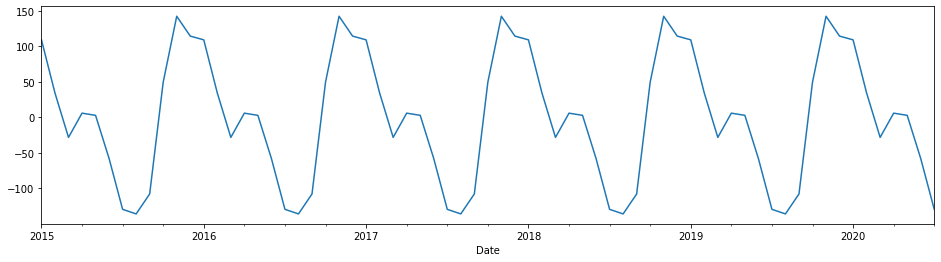

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_month["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

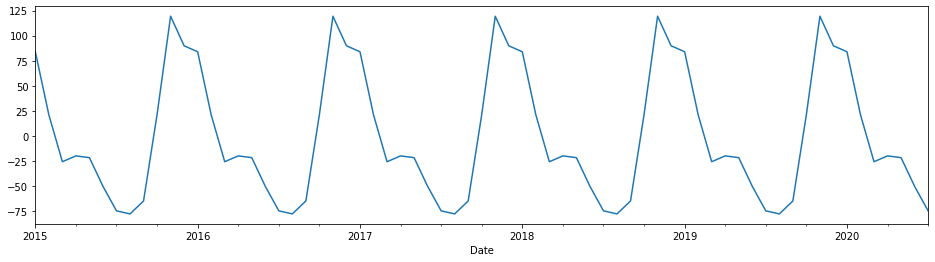

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_month["PM2.5"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

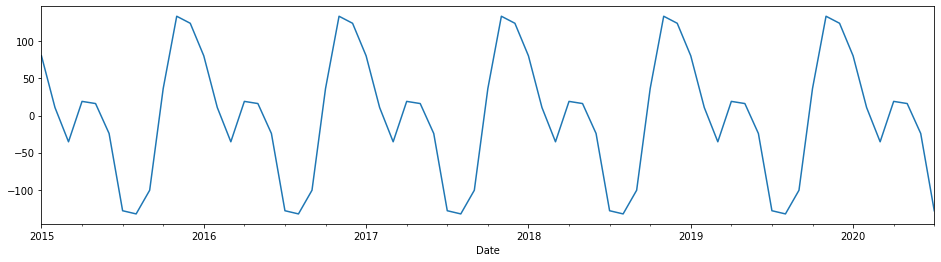

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(data_month["PM10"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

#Splitting on Months

In [ ]:
data_delhi["2015-03-01":"2015-06-30"]

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-03-01   71.83   98.89   8.49  21.42  ...  11.62  10.99  22.51  324.0
2015-03-02   53.71   60.15  11.02  13.43  ...  10.19   3.21  22.08  226.0
2015-03-03   83.49  112.10  16.23  23.75  ...  11.72   5.07  20.83  266.0
2015-03-04   91.07  139.15  13.71  24.28  ...  10.64   4.68  25.83  200.0
2015-03-05  106.57  196.19  25.97  31.12  ...   9.36   5.97  32.88  275.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2015-06-26   76.00  182.48  32.60  46.88  ...   1.04   6.84  60.99  192.0
2015-06-27   69.46  195.20  19.12  38.55  ...   1.01   7.28  53.19  207.0
2015-06-28   79.84  214.78  20.29  47.19  ...   1.13   7.53  58.34  219.0
2015-06-29   48.50   96.78   5.47  38.37  ...   1.07   7.74  52.21  193.0
2015-06-30   53.79  109.92   8.54  46.06  ...   1.05   9.15  58.33  170.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2016-03-01":"2016-06-30"]

PM2.5    PM10      NO     NO2  ...    CO    SO2      O3    AQI
Date                                        ...                            
2016-03-01  213.62  299.88  113.63  102.02  ...  2.43  25.49  138.30  370.0
2016-03-02  175.63  244.58  123.21  102.23  ...  1.94  25.53  157.07  365.0
2016-03-03  165.22  264.31  116.23  100.71  ...  2.61  33.45  113.89  348.0
2016-03-04  115.55  201.71   28.05   60.47  ...  1.36  16.60  103.88  312.0
2016-03-05   53.00  129.37    9.63   48.15  ...  0.73  19.05   84.88  214.0
...            ...     ...     ...     ...  ...   ...    ...     ...    ...
2016-06-26   48.00   86.63    4.54   40.57  ...  0.85   8.71   58.37  158.0
2016-06-27   76.76  112.46    5.66   37.28  ...  1.71   7.63   51.76  154.0
2016-06-28   80.89   96.05   12.43   40.07  ...  3.00   9.77   55.61  187.0
2016-06-29   60.67   68.43    7.96   37.01  ...  2.08  10.22   44.44  180.0
2016-06-30   69.65  103.25    9.49   34.17  ...  2.39   9.43   51.31  190.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2017-03-01":"2017-06-30"]

PM2.5    PM10      NO    NO2  ...    CO    SO2     O3    AQI
Date                                       ...                           
2017-03-01  127.90  359.47  122.04  79.46  ...  0.92  24.07  45.24  397.0
2017-03-02  114.68  300.55   64.39  69.08  ...  0.47  23.53  35.22  280.0
2017-03-03   67.83  181.19   45.45  56.64  ...  0.57  19.69  32.02  206.0
2017-03-04   82.32  196.84   48.61  60.55  ...  0.57  22.03  27.77  190.0
2017-03-05   90.60  229.62   42.58  61.48  ...  0.69  25.34  31.88  210.0
...            ...     ...     ...    ...  ...   ...    ...    ...    ...
2017-06-26   51.52  359.19   20.96  53.97  ...  0.00   2.34  39.61  108.0
2017-06-27   36.62  286.38   16.90  54.02  ...  0.00   2.34  39.61   73.0
2017-06-28   29.83  128.18   30.92  58.02  ...  0.00   2.34  39.61   58.0
2017-06-29   22.98  103.80   21.60  35.01  ...  0.00   2.34  39.61   58.0
2017-06-30   25.83   90.41   44.88  32.97  ...  0.00   2.34  39.61   46.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2018-03-01":"2018-06-30"]

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                      ...                           
2018-03-01  120.71  256.86  45.93  51.74  ...  1.43  14.90  40.69  293.0
2018-03-02  139.18  253.32  46.05  50.64  ...  1.64  11.52  45.55  300.0
2018-03-03   98.25  205.92  26.84  41.07  ...  1.18  12.93  38.38  244.0
2018-03-04   79.83  182.26  25.27  39.02  ...  0.99  12.95  34.95  205.0
2018-03-05   76.96  164.74  24.87  39.58  ...  0.99  12.70  40.45  180.0
...            ...     ...    ...    ...  ...   ...    ...    ...    ...
2018-06-26   29.98   92.12   8.89  34.16  ...  0.72  13.16  33.09  128.0
2018-06-27   52.48  111.40   9.03  31.00  ...  0.84  10.43  44.04  126.0
2018-06-28   30.07   71.42   8.68  29.01  ...  0.76   8.48  33.17   99.0
2018-06-29   37.11   84.12  10.99  30.43  ...  0.87   9.36  31.43   90.0
2018-06-30   41.41  103.75  10.42  32.89  ...  0.91   9.55  31.21  113.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2019-03-01":"2019-06-30"]

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                      ...                           
2019-03-01   93.83  181.26  37.55  48.87  ...  1.17  15.81  37.75  222.0
2019-03-02  109.60  182.54  40.68  62.05  ...  1.36  17.96  25.07  227.0
2019-03-03   62.92  105.16  20.21  40.61  ...  1.16  13.48  33.59  172.0
2019-03-04  105.93  180.84  49.62  40.10  ...  1.54  14.75  38.13  217.0
2019-03-05   68.86  135.40  18.77  40.05  ...  1.01  14.26  36.30  173.0
...            ...     ...    ...    ...  ...   ...    ...    ...    ...
2019-06-26   67.36  155.90  15.67  37.39  ...  1.16  12.87  46.26  161.0
2019-06-27   65.30  230.98  17.87  39.94  ...  1.16  13.46  46.84  169.0
2019-06-28   61.21  239.15  19.71  38.37  ...  1.02  14.43  38.39  207.0
2019-06-29   58.08  271.27  16.84  34.56  ...  0.93  11.99  37.99  223.0
2019-06-30   65.24  270.03  22.46  33.03  ...  1.04  12.82  44.40  234.0

[122 rows x 10 columns]

In [ ]:
data_delhi["2020-03-01":"2020-06-30"]

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                     ...                           
2020-03-01  42.83   91.88  20.57  40.73  ...  0.97  12.19  39.84  105.0
2020-03-02  99.34  203.51  64.58  50.23  ...  1.58  15.81  36.64  192.0
2020-03-03  86.26  188.73  50.52  46.60  ...  1.22  15.48  32.39  226.0
2020-03-04  82.90  193.79  40.18  45.62  ...  1.10  16.22  41.77  200.0
2020-03-05  31.43   67.50  11.78  32.97  ...  0.81  11.32  36.98  112.0
...           ...     ...    ...    ...  ...   ...    ...    ...    ...
2020-06-26  50.01  112.08   9.67  22.06  ...  1.01  11.66  24.82  104.0
2020-06-27  39.80  155.94  10.88  21.46  ...  0.87  10.38  18.88  112.0
2020-06-28  59.52  308.65  12.67  21.60  ...  0.94  10.70  18.05  196.0
2020-06-29  44.86  184.12  10.50  21.57  ...  0.88  11.58  26.61  233.0
2020-06-30  39.80   91.98   5.99  17.96  ...  0.84  10.51  37.29  114.0

[122 rows x 10 columns]

In [ ]:
data_delhi_summer=data_delhi["2015-03-01":"2015-06-30"]

In [ ]:
data_delhi_monsoon=data_delhi["2015-07-01":"2015-10-31"]

In [ ]:
data_delhi_winter=data_delhi["2015-11-01":"2016-02-29"]

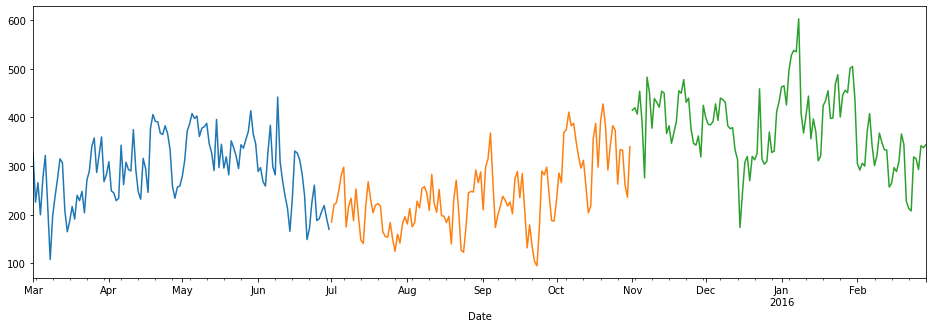

In [ ]:
data_delhi_summer["AQI"].plot(figsize=(16, 5))
data_delhi_monsoon["AQI"].plot()
data_delhi_winter["AQI"].plot()

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2016-03-01":"2016-06-30"])

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2017-03-01":"2017-06-30"])

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2018-03-01":"2018-06-30"])

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2019-03-01":"2019-06-30"])

In [ ]:
data_delhi_summer=data_delhi_summer.append(data_delhi["2020-03-01":"2020-06-30"])

In [ ]:
x=data_delhi_summer.groupby([data_delhi_summer.index.month, data_delhi_summer.index.day]).mean()

In [ ]:
x.head(120)

PM2.5        PM10         NO  ...        SO2         O3         AQI
Date Date                                     ...                                  
3    1     111.786667  214.706667  58.035000  ...  17.241667  54.055000  285.166667
     2     115.356667  207.441667  58.321667  ...  16.260000  53.605000  265.000000
     3      93.995000  176.235000  45.913333  ...  16.683333  45.183333  243.666667
     4      92.933333  182.431667  34.240000  ...  14.538333  45.388333  220.666667
     5      71.236667  153.803333  22.266667  ...  14.773333  43.895000  194.000000
...               ...         ...        ...  ...        ...        ...         ...
6    24     66.843333  183.826667  18.831667  ...   9.158333  57.626667  173.166667
     25     53.288333  152.713333  11.821667  ...   9.373333  47.428333  171.833333
     26     53.811667  164.733333  15.388333  ...   9.263333  43.856667  141.833333
     27     56.736667  182.060000  13.243333  ...   8.586667  42.386667  140.166667
     28     56.893333  176.371667  17.450000  ...   8.875000  40.528333  161.000000

[120 rows x 10 columns]

In [ ]:
data_delhi_summer

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-03-01   71.83   98.89   8.49  21.42  ...  11.62  10.99  22.51  324.0
2015-03-02   53.71   60.15  11.02  13.43  ...  10.19   3.21  22.08  226.0
2015-03-03   83.49  112.10  16.23  23.75  ...  11.72   5.07  20.83  266.0
2015-03-04   91.07  139.15  13.71  24.28  ...  10.64   4.68  25.83  200.0
2015-03-05  106.57  196.19  25.97  31.12  ...   9.36   5.97  32.88  275.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2020-06-26   50.01  112.08   9.67  22.06  ...   1.01  11.66  24.82  104.0
2020-06-27   39.80  155.94  10.88  21.46  ...   0.87  10.38  18.88  112.0
2020-06-28   59.52  308.65  12.67  21.60  ...   0.94  10.70  18.05  196.0
2020-06-29   44.86  184.12  10.50  21.57  ...   0.88  11.58  26.61  233.0
2020-06-30   39.80   91.98   5.99  17.96  ...   0.84  10.51  37.29  114.0

[732 rows x 10 columns]

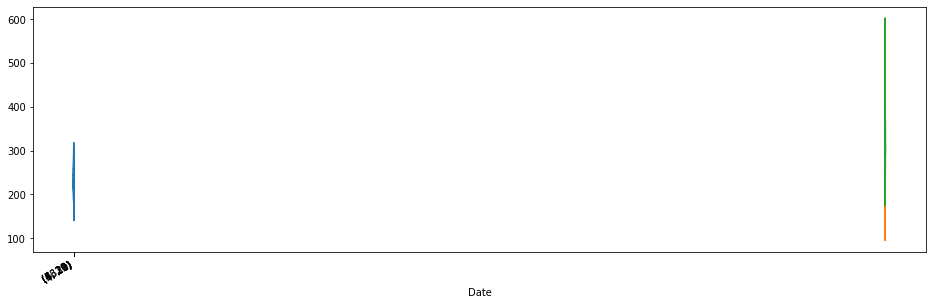

In [ ]:
x["AQI"].plot(figsize=(16, 5))
data_delhi_monsoon["AQI"].plot()
data_delhi_winter["AQI"].plot()

In [ ]:
data_delhi_monsoon=data_delhi_monsoon.append(data_delhi["2016-07-01":"2016-10-31"])
data_delhi_monsoon=data_delhi_monsoon.append(data_delhi["2017-07-01":"2017-10-31"])
data_delhi_monsoon=data_delhi_monsoon.append(data_delhi["2018-07-01":"2018-10-31"])
data_delhi_monsoon=data_delhi_monsoon.append(data_delhi["2019-07-01":"2019-10-31"])

In [ ]:
data_delhi_monsoon

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                      ...                           
2015-07-01   57.99  135.43   8.88  49.64  ...  1.06   8.88  61.42  185.0
2015-07-02   67.12  175.90  12.29  52.45  ...  1.12   6.86  61.70  220.0
2015-07-03   65.25  219.31  19.11  37.09  ...  0.99   8.91  59.66  225.0
2015-07-04   88.75  212.16  20.90  35.54  ...  0.98   7.24  56.61  250.0
2015-07-05  135.92  435.20  19.63  36.89  ...  1.17   6.42  58.36  282.0
...            ...     ...    ...    ...  ...   ...    ...    ...    ...
2019-10-27  198.81  321.68  46.63  48.37  ...  1.77  13.21  47.27  354.0
2019-10-28  301.39  420.35  35.11  48.45  ...  1.77  18.03  42.79  417.0
2019-10-29  287.56  440.77  58.36  60.03  ...  2.43  12.71  33.20  419.0
2019-10-30  279.32  454.35  87.70  63.87  ...  2.67  13.81  34.86  452.0
2019-10-31  314.32  500.04  99.58  71.37  ...  2.92  15.86  38.29  460.0

[615 rows x 10 columns]

In [ ]:
data_delhi_monsoon_avg=data_delhi_monsoon.groupby([data_delhi_monsoon.index.month, data_delhi_monsoon.index.day]).mean()

In [ ]:
data_delhi_monsoon_avg

PM2.5     PM10      NO     NO2  ...     CO     SO2      O3    AQI
Date Date                                    ...                              
7    1      50.200  152.056  20.976  31.174  ...  1.002   7.988  44.894  146.0
     2      50.160  170.312  14.288  30.318  ...  1.138   7.570  48.082  147.0
     3      52.820  157.024  15.522  31.556  ...  1.124   7.976  46.052  142.4
     4      68.910  109.938  16.696  30.648  ...  0.918   7.670  44.486  159.6
     5      70.890  178.226  19.988  34.362  ...  1.108   7.892  43.472  180.4
...            ...      ...     ...     ...  ...    ...     ...     ...    ...
10   27    196.374  364.058  70.822  72.086  ...  1.914  19.900  65.808  397.4
     28    227.244  376.374  64.218  70.752  ...  1.820  21.606  77.076  420.4
     29    230.664  373.684  81.072  80.620  ...  2.160  26.624  76.574  398.8
     30    240.650  381.402  83.080  71.812  ...  2.322  22.852  98.416  401.2
     31    286.404  404.940  96.560  68.158  ...  2.354  28.510  69.304  421.6

[123 rows x 10 columns]

In [ ]:
data_delhi_winter=data_delhi_winter.append(data_delhi["2016-11-01":"2017-02-28"])
data_delhi_winter=data_delhi_winter.append(data_delhi["2017-11-01":"2018-02-28"])
data_delhi_winter=data_delhi_winter.append(data_delhi["2018-11-01":"2019-02-28"])
data_delhi_winter=data_delhi_winter.append(data_delhi["2019-11-01":"2020-02-28"])

In [ ]:
data_delhi_winter_avg=data_delhi_winter.groupby([data_delhi_winter.index.month, data_delhi_winter.index.day]).mean()

In [ ]:
# data_delhi_winter=data_delhi["2015-11-01":"2016-02-28"]

In [ ]:
data_delhi_winter

PM2.5    PM10      NO    NO2  ...    CO    SO2      O3    AQI
Date                                       ...                            
2015-11-01  277.53  379.38   60.39  60.17  ...  2.41  28.58   84.99  415.0
2015-11-02  232.40  361.00   67.14  68.40  ...  2.05  31.66  136.67  420.0
2015-11-03  244.78  385.66   51.06  82.74  ...  2.09  29.19   99.91  407.0
2015-11-04  293.49  401.49  105.88  87.47  ...  2.54  31.58  114.43  454.0
2015-11-05  161.78  234.94   44.61  63.78  ...  1.76  21.21   75.71  388.0
...            ...     ...     ...    ...  ...   ...    ...     ...    ...
2020-02-24   70.59  145.05   29.23  44.20  ...  1.02  15.94   33.36  169.0
2020-02-25  127.75  224.02   27.87  46.76  ...  1.22  18.24   35.32  244.0
2020-02-26  141.81  258.62   56.86  50.67  ...  1.54  17.61   38.64  303.0
2020-02-27  107.28  203.77   22.85  46.15  ...  1.23  14.70   36.36  270.0
2020-02-28   83.48  161.36    8.21  33.92  ...  0.97  11.55   41.53  214.0

[601 rows x 10 columns]

In [ ]:
# data_delhi_winter["PM2.5"]=data_delhi_winter["PM2.5"].values+data_delhi["2016-11-01":"2017-02-28"]["PM2.5"].values

In [ ]:
data_delhi_winter["PM2.5"]

Date
2015-11-01    277.53
2015-11-02    232.40
2015-11-03    244.78
2015-11-04    293.49
2015-11-05    161.78
               ...  
2020-02-24     70.59
2020-02-25    127.75
2020-02-26    141.81
2020-02-27    107.28
2020-02-28     83.48
Name: PM2.5, Length: 601, dtype: float64

In [ ]:
data_delhi_winter_avg

PM2.5     PM10       NO     NO2  ...     CO     SO2      O3    AQI
Date Date                                     ...                              
1    1     290.020  447.676   90.838  71.558  ...  2.244  20.708  61.216  444.8
     2     284.544  442.618  108.710  74.072  ...  2.248  19.254  57.358  454.8
     3     265.348  413.748   87.338  68.310  ...  2.062  17.120  52.492  433.4
     4     260.682  404.194   96.070  80.358  ...  2.018  18.300  51.466  425.4
     5     241.336  383.710   76.462  73.872  ...  1.786  18.754  57.692  407.6
...            ...      ...      ...     ...  ...    ...     ...     ...    ...
12   27    230.930  382.654   69.452  76.532  ...  3.638  19.000  52.654  379.6
     28    239.318  404.888   79.098  78.384  ...  3.272  19.402  51.490  403.8
     29    260.364  421.530   62.926  72.860  ...  1.828  19.022  54.708  425.8
     30    281.696  430.316   70.330  68.552  ...  2.008  19.570  53.952  440.8
     31    264.704  404.212   71.964  62.920  ...  1.994  18.856  55.212  429.6

[121 rows x 10 columns]

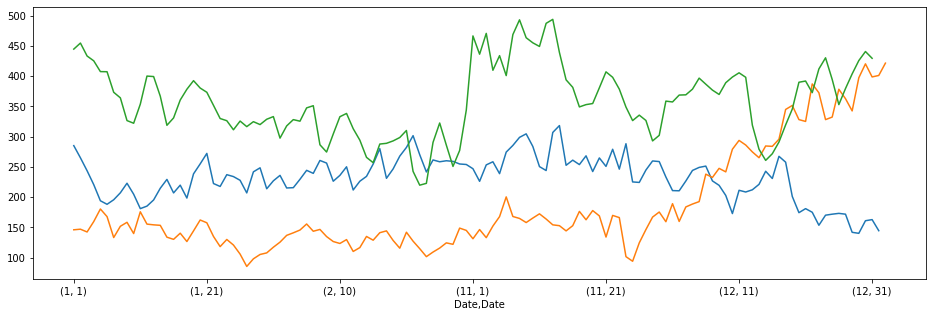

In [ ]:
x["AQI"].plot(figsize=(16, 5))
data_delhi_monsoon_avg["AQI"].plot()
data_delhi_winter_avg["AQI"].plot()


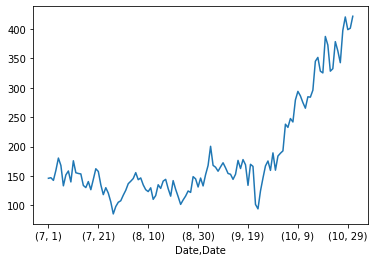

In [ ]:
data_delhi_monsoon_avg["AQI"].plot()


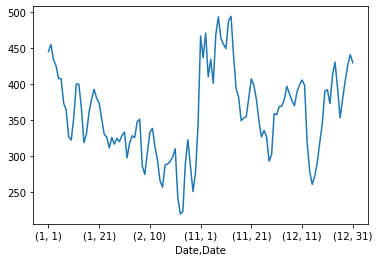

In [ ]:
data_delhi_winter_avg["AQI"].plot()

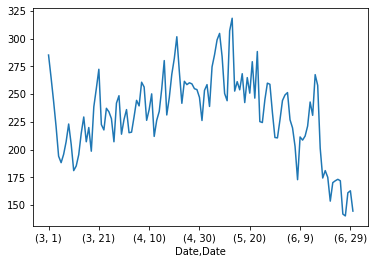

In [ ]:
x["AQI"].plot()

In [ ]:
winter_copy=data_delhi_winter_avg[["PM2.5",	"PM10",	"NO",	"NO2",	"NOx",	"NH3", "CO",	"SO2",	"O3",	"AQI"]]

In [ ]:
winter_copy

PM2.5     PM10       NO     NO2  ...     CO     SO2      O3    AQI
Date Date                                     ...                              
1    1     290.020  447.676   90.838  71.558  ...  2.244  20.708  61.216  444.8
     2     284.544  442.618  108.710  74.072  ...  2.248  19.254  57.358  454.8
     3     265.348  413.748   87.338  68.310  ...  2.062  17.120  52.492  433.4
     4     260.682  404.194   96.070  80.358  ...  2.018  18.300  51.466  425.4
     5     241.336  383.710   76.462  73.872  ...  1.786  18.754  57.692  407.6
...            ...      ...      ...     ...  ...    ...     ...     ...    ...
12   27    230.930  382.654   69.452  76.532  ...  3.638  19.000  52.654  379.6
     28    239.318  404.888   79.098  78.384  ...  3.272  19.402  51.490  403.8
     29    260.364  421.530   62.926  72.860  ...  1.828  19.022  54.708  425.8
     30    281.696  430.316   70.330  68.552  ...  2.008  19.570  53.952  440.8
     31    264.704  404.212   71.964  62.920  ...  1.994  18.856  55.212  429.6

[121 rows x 10 columns]

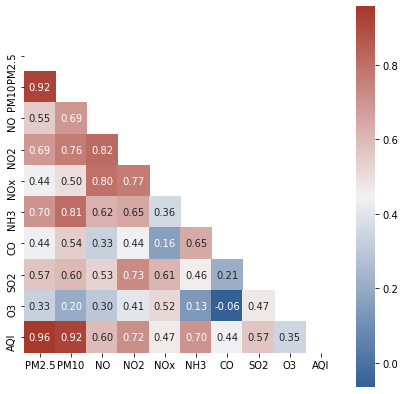

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data_delhi_winter_avg.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

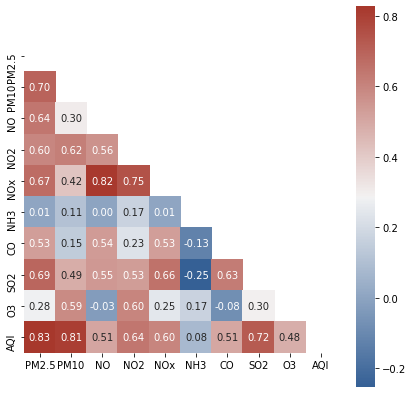

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = x.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

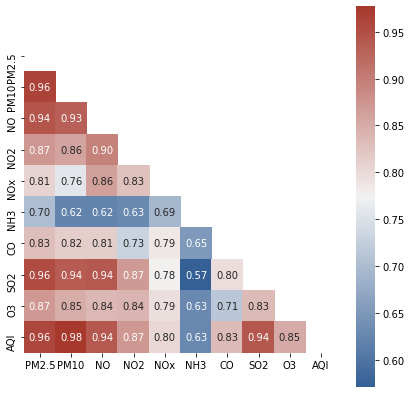

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data_delhi_monsoon_avg.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

In [ ]:
data_delhi_monsoon

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                      ...                           
2015-07-01   57.99  135.43   8.88  49.64  ...  1.06   8.88  61.42  185.0
2015-07-02   67.12  175.90  12.29  52.45  ...  1.12   6.86  61.70  220.0
2015-07-03   65.25  219.31  19.11  37.09  ...  0.99   8.91  59.66  225.0
2015-07-04   88.75  212.16  20.90  35.54  ...  0.98   7.24  56.61  250.0
2015-07-05  135.92  435.20  19.63  36.89  ...  1.17   6.42  58.36  282.0
...            ...     ...    ...    ...  ...   ...    ...    ...    ...
2019-10-27  198.81  321.68  46.63  48.37  ...  1.77  13.21  47.27  354.0
2019-10-28  301.39  420.35  35.11  48.45  ...  1.77  18.03  42.79  417.0
2019-10-29  287.56  440.77  58.36  60.03  ...  2.43  12.71  33.20  419.0
2019-10-30  279.32  454.35  87.70  63.87  ...  2.67  13.81  34.86  452.0
2019-10-31  314.32  500.04  99.58  71.37  ...  2.92  15.86  38.29  460.0

[615 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


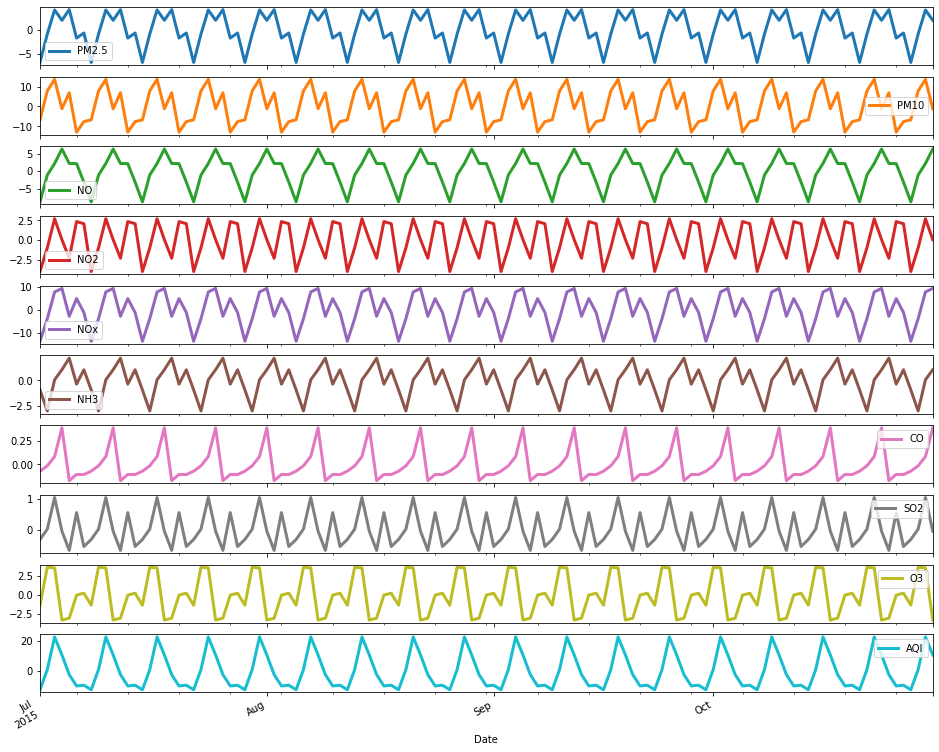

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

seasonality_dict = {}

for ts in data_delhi_monsoon_avg.columns:
    decompositions = sm.tsa.seasonal_decompose(data_delhi_monsoon["2015"][ts].dropna())
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict).plot(
    subplots=True, layout=(10, 1), linewidth=3
);

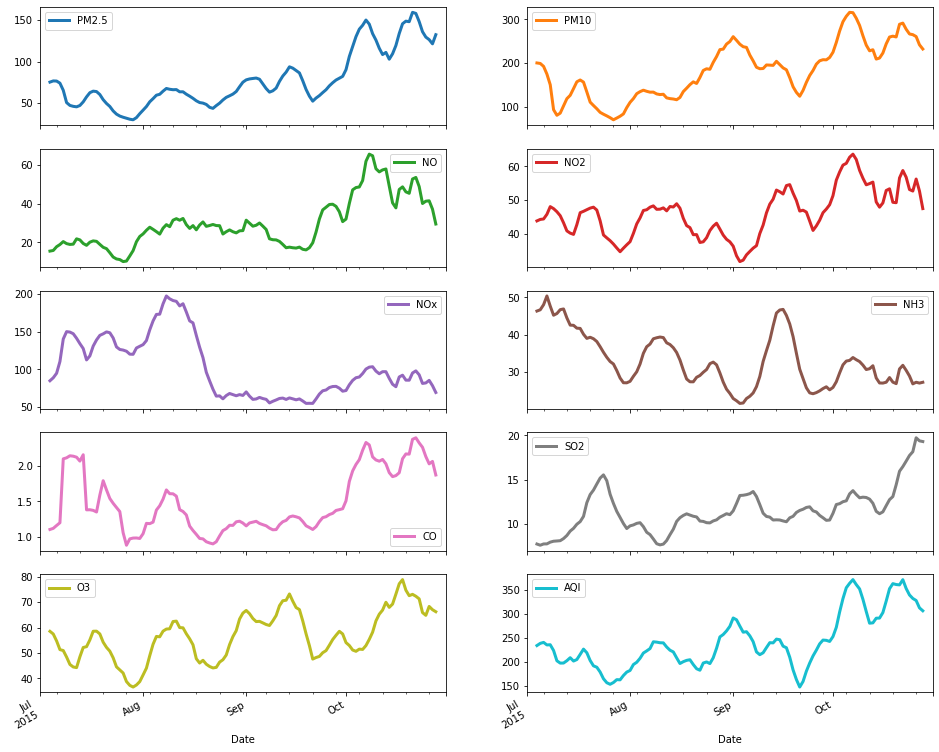

In [ ]:
trend_dict1 = {}

for ts in data_delhi_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_monsoon["2015"][ts].dropna())
    # Store back the results
    trend_dict1[ts] = decomposition.trend

pd.DataFrame(trend_dict1).plot(subplots=True, layout=(5, 2), linewidth=3);

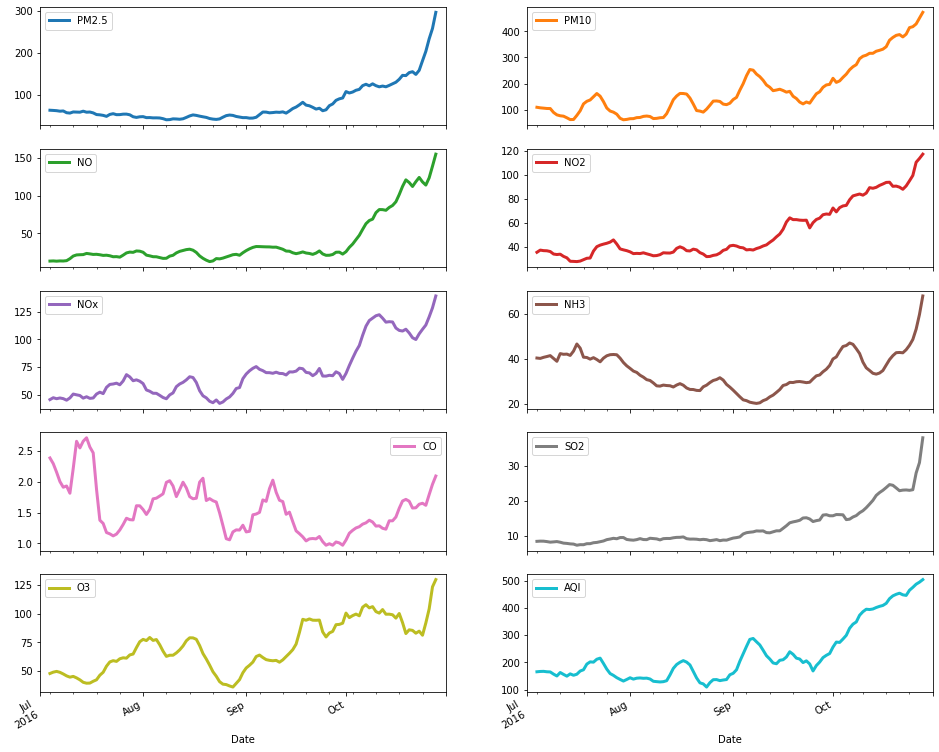

In [ ]:
trend_dict2={}

for ts in data_delhi_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_monsoon["2016"][ts].dropna())
    # Store back the results
    trend_dict2[ts] = decomposition.trend

pd.DataFrame(trend_dict2).plot(subplots=True, layout=(5, 2), linewidth=3);

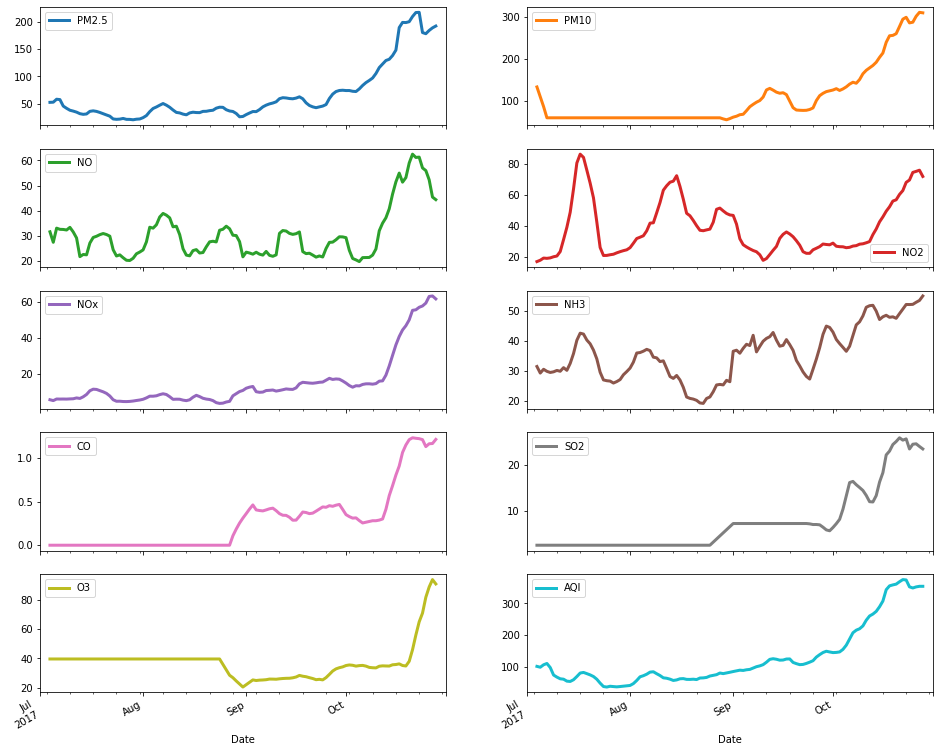

In [ ]:
trend_dict3={}
for ts in data_delhi_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_monsoon["2017"][ts].dropna())
    # Store back the results
    trend_dict3[ts] = decomposition.trend

pd.DataFrame(trend_dict3).plot(subplots=True, layout=(5, 2), linewidth=3);

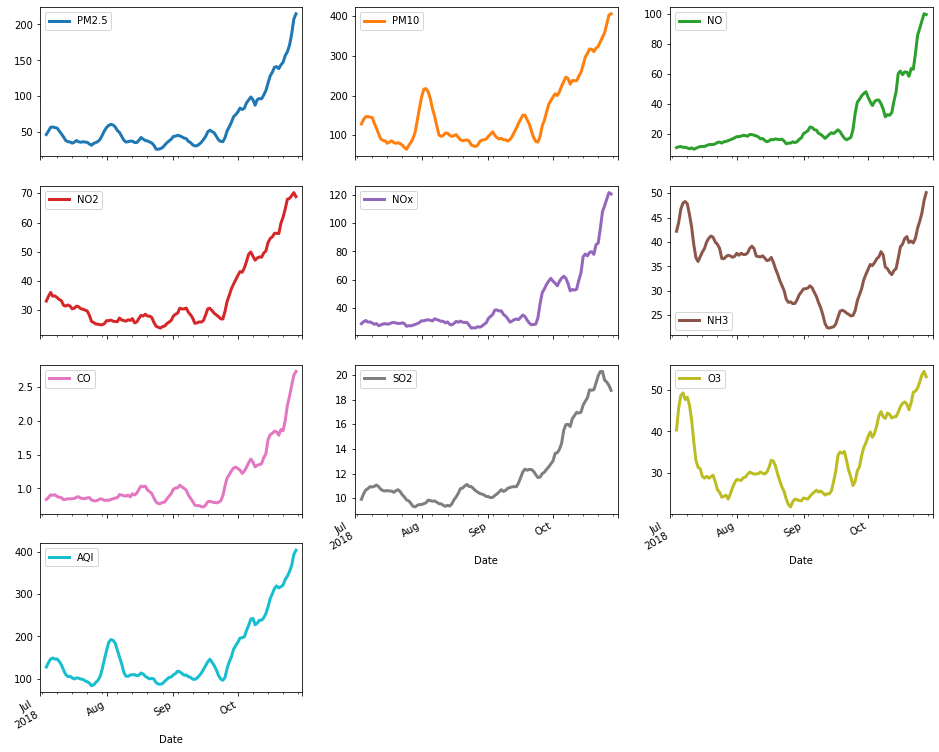

In [ ]:
trend_dict4={}
for ts in data_delhi_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_monsoon["2018"][ts].dropna())
    # Store back the results
    trend_dict4[ts] = decomposition.trend

pd.DataFrame(trend_dict4).plot(subplots=True, layout=(4, 3), linewidth=3);

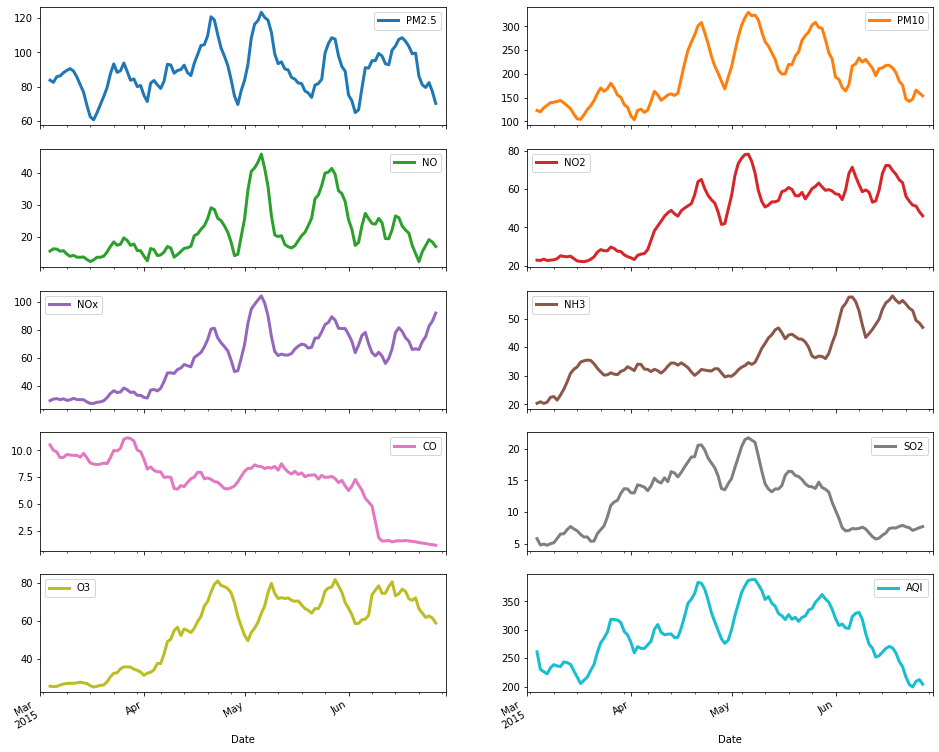

In [ ]:
trend_dict1={}
for ts in data_delhi_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_summer["2015"][ts].dropna())
    # Store back the results
    trend_dict1[ts] = decomposition.trend

pd.DataFrame(trend_dict1).plot(subplots=True, layout=(5, 2), linewidth=3);

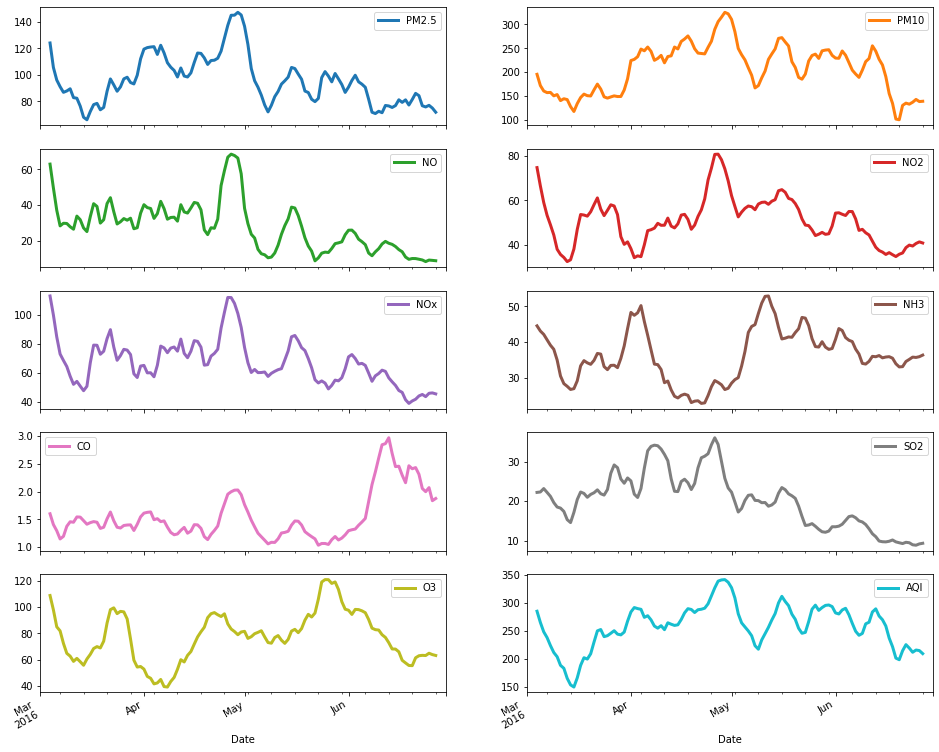

In [ ]:
trend_dict2={}
for ts in data_delhi_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_summer["2016"][ts].dropna())
    # Store back the results
    trend_dict2[ts] = decomposition.trend

pd.DataFrame(trend_dict2).plot(subplots=True, layout=(5, 2), linewidth=3);

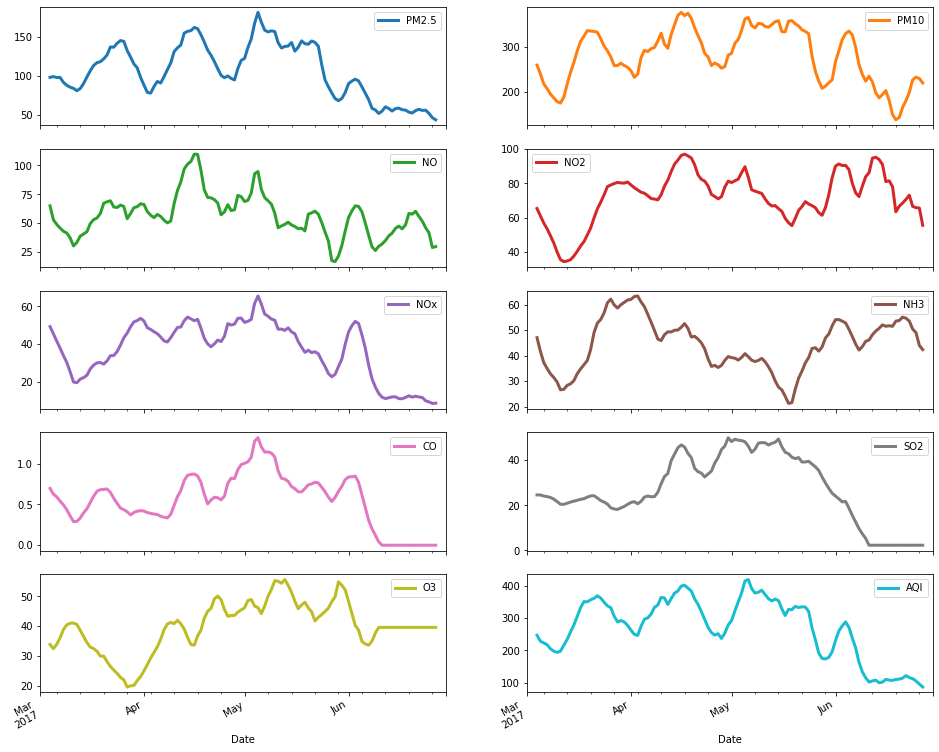

In [ ]:
trend_dict3={}
for ts in data_delhi_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_summer["2017"][ts].dropna())
    # Store back the results
    trend_dict3[ts] = decomposition.trend

pd.DataFrame(trend_dict3).plot(subplots=True, layout=(5, 2), linewidth=3);

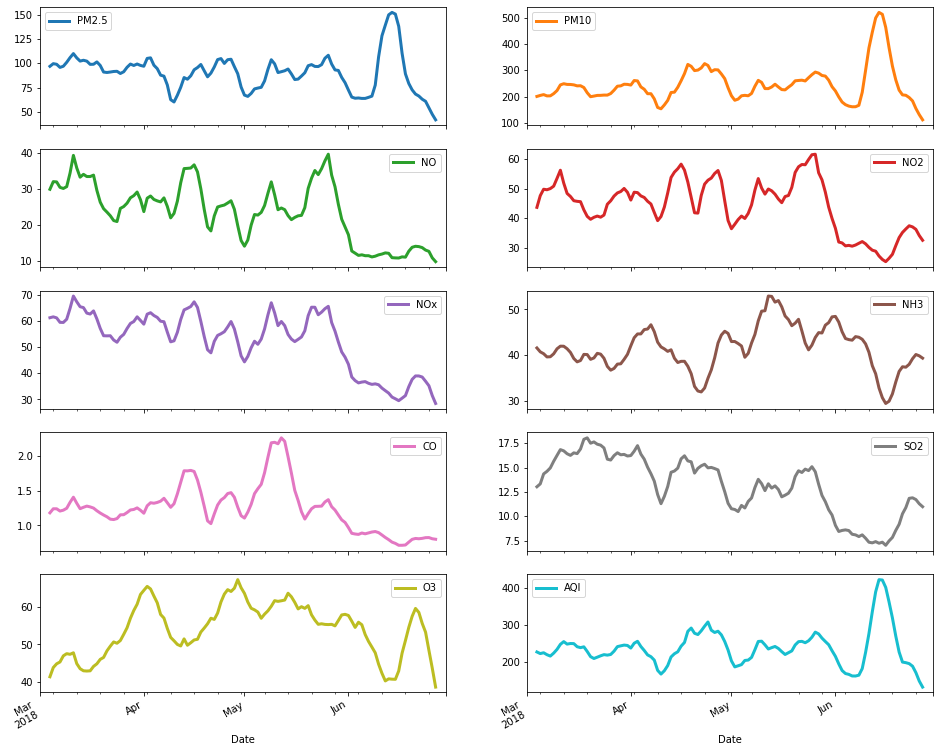

In [ ]:
trend_dict4={}
for ts in data_delhi_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_summer["2018"][ts].dropna())
    # Store back the results
    trend_dict4[ts] = decomposition.trend

pd.DataFrame(trend_dict4).plot(subplots=True, layout=(5, 2), linewidth=3);

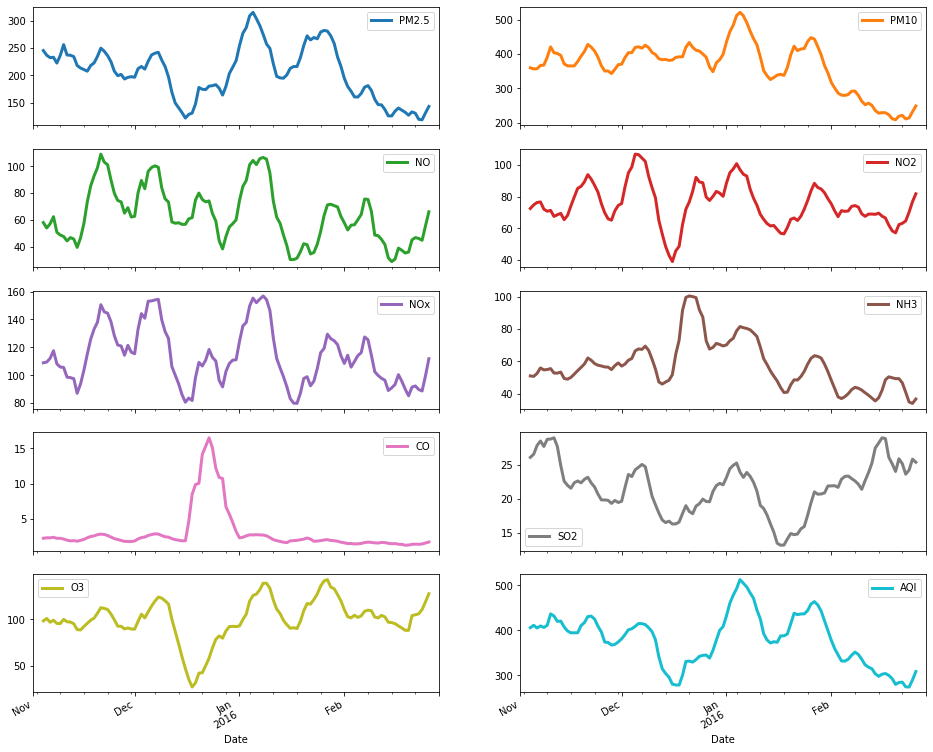

In [ ]:
trend_dict = {}

for ts in data_delhi_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_winter["2015-11-01":"2016-02-29"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

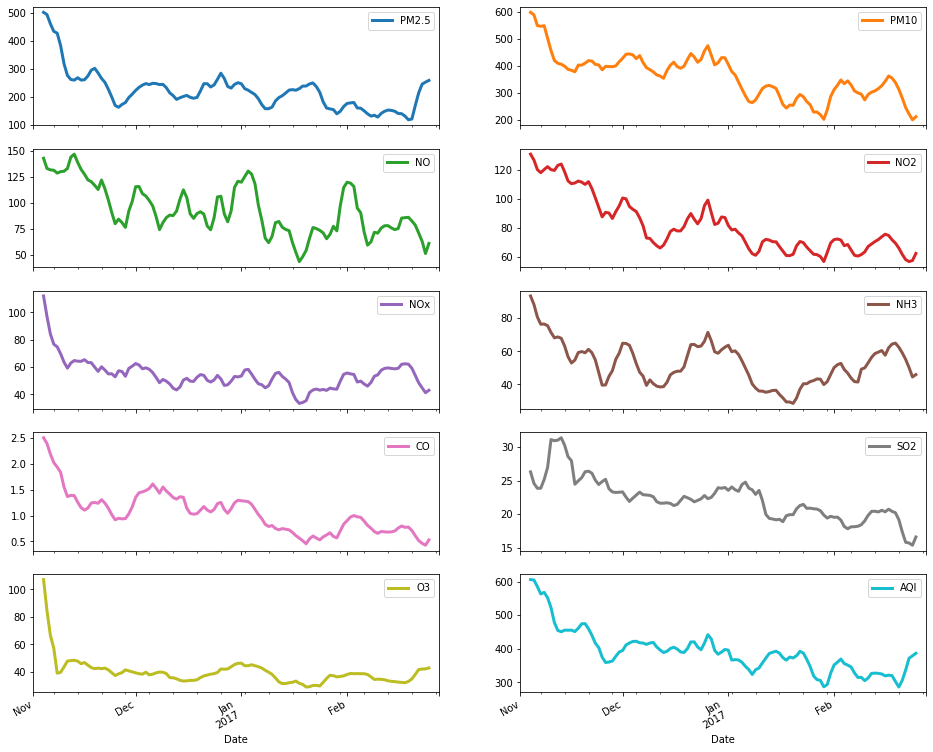

In [ ]:
trend_dict = {}

for ts in data_delhi_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_winter["2016-11-01":"2017-02-28"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

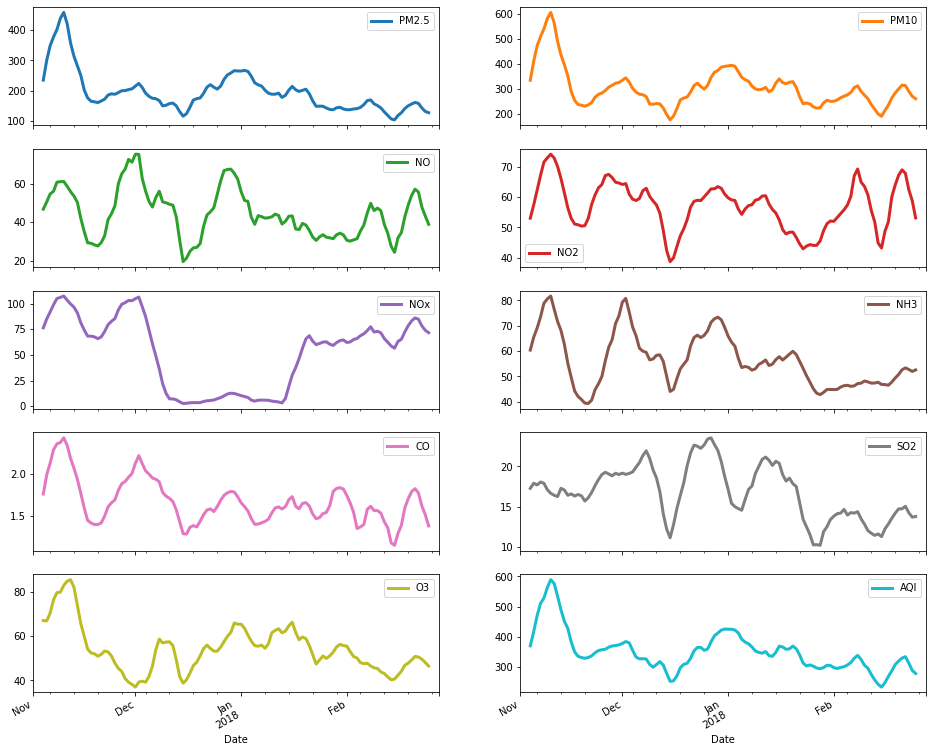

In [ ]:
trend_dict = {}

for ts in data_delhi_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_winter["2017-11-01":"2018-02-28"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

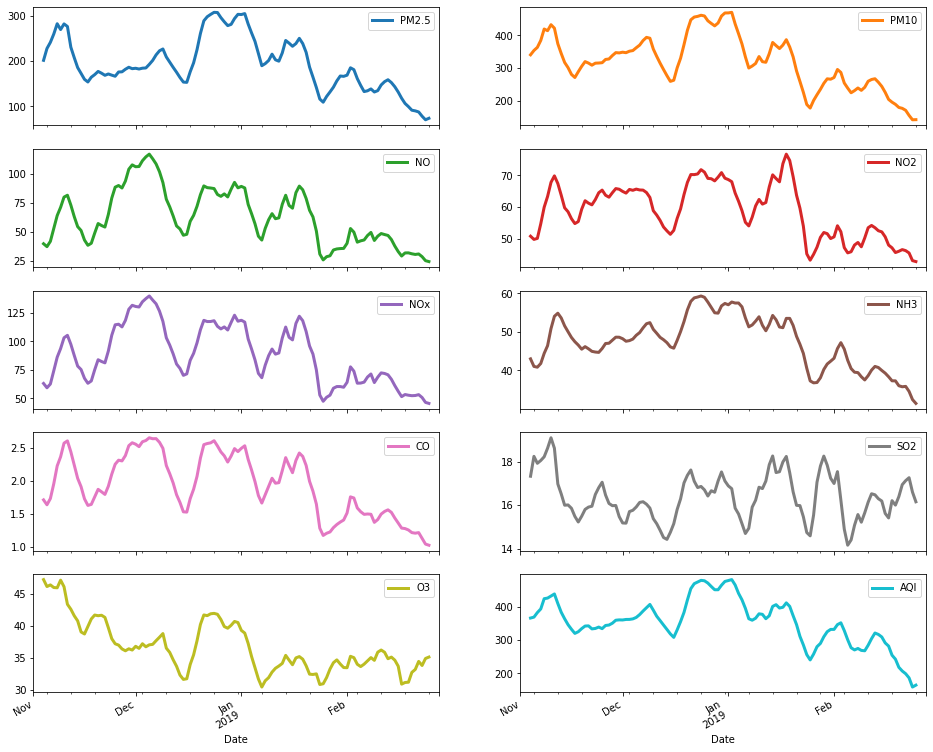

In [ ]:
trend_dict = {}

for ts in data_delhi_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi_winter["2018-11-01":"2019-02-28"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

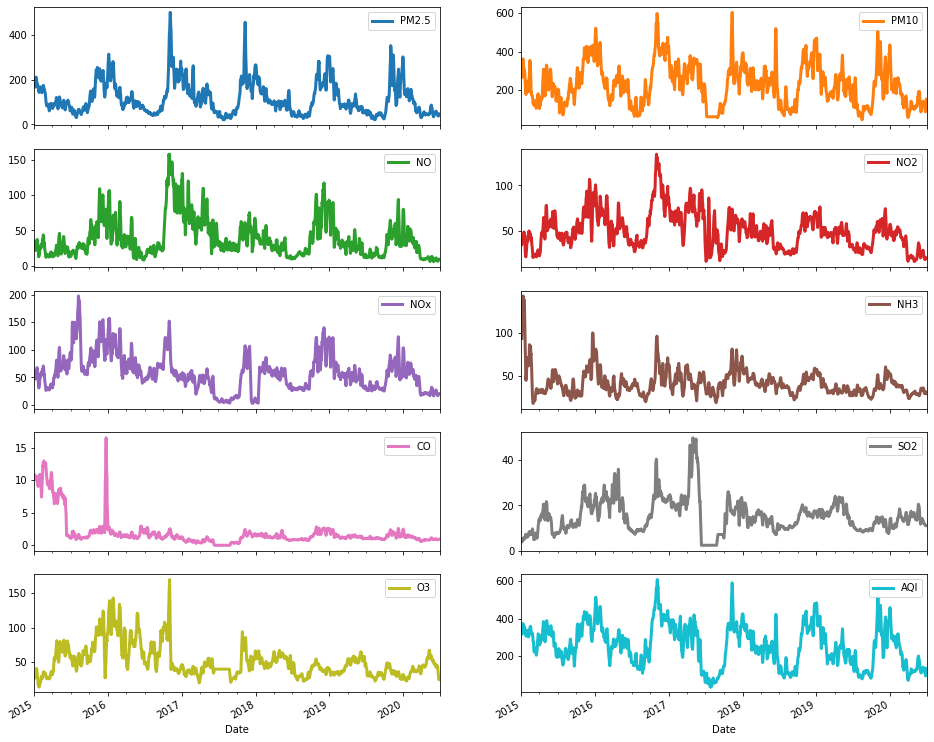

In [ ]:
trend_dict = {}

for ts in data_delhi.columns:
    decomposition = sm.tsa.seasonal_decompose(data_delhi[ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


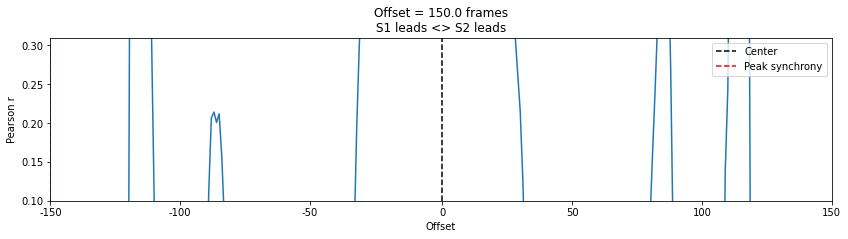

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = data_delhi_monsoon["2018"]['PM2.5']
d2 = data_delhi_monsoon["2018"]['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [ ]:
!pip install dtw

  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5315 sha256=96d72a69817e8788cbbc75217574bad3a2b541c7c5ee1e603ec7795506f749a9
  Stored in directory: /root/.cache/pip/wheels/f9/51/54/b7f446e6d4f5be9a66066b59c5030731191260515737be4496
Successfully built dtw


In [ ]:
# # Windowed time lagged cross correlation
# seconds = 5
# fps = 30
# no_splits = 20
# samples_per_split = df.shape[0]/no_splits
# rss=[]
# for t in range(0, no_splits):
#     d1 = df['S1_Jo'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     d2 = df['S2_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
# rss = pd.DataFrame(rss)
# f,ax = plt.subplots(figsize=(10,5))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# # Rolling window time lagged cross correlation
# seconds = 5
# fps = 30
# window_size = 300 #samples
# t_start = 0
# t_end = t_start + window_size
# step_size = 30
# rss=[]
# while t_end < 5400:
#     d1 = df['S1_Joy'].iloc[t_start:t_end]
#     d2 = df['S2_Joy'].iloc[t_start:t_end]
#     rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
#     t_start = t_start + step_size
#     t_end = t_end + step_size
# rss = pd.DataFrame(rss)

# f,ax = plt.subplots(figsize=(10,10))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

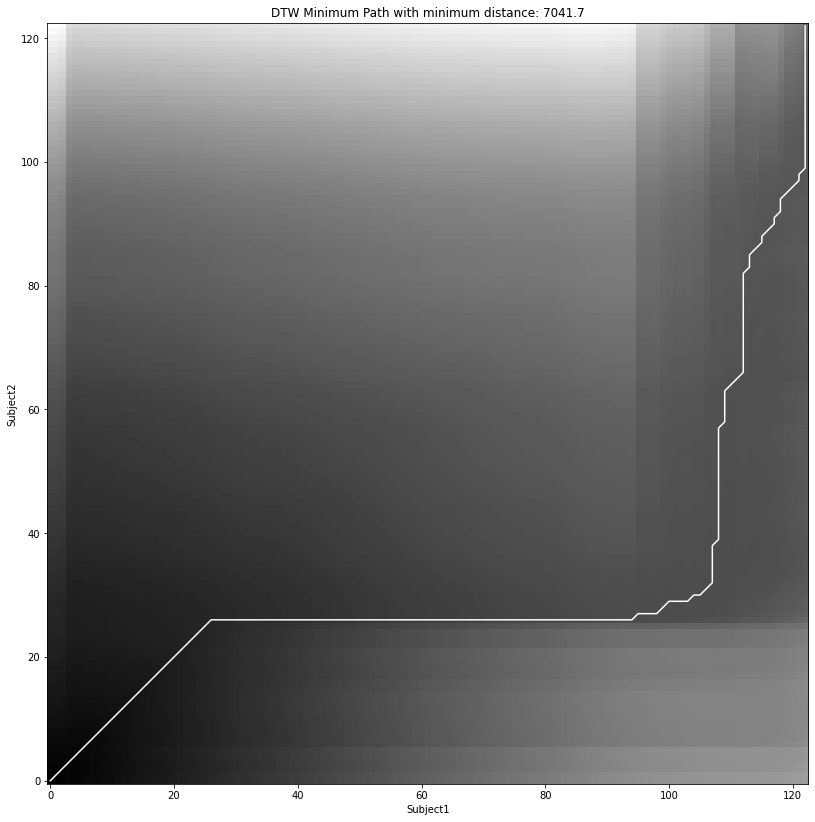

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['PM2.5'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

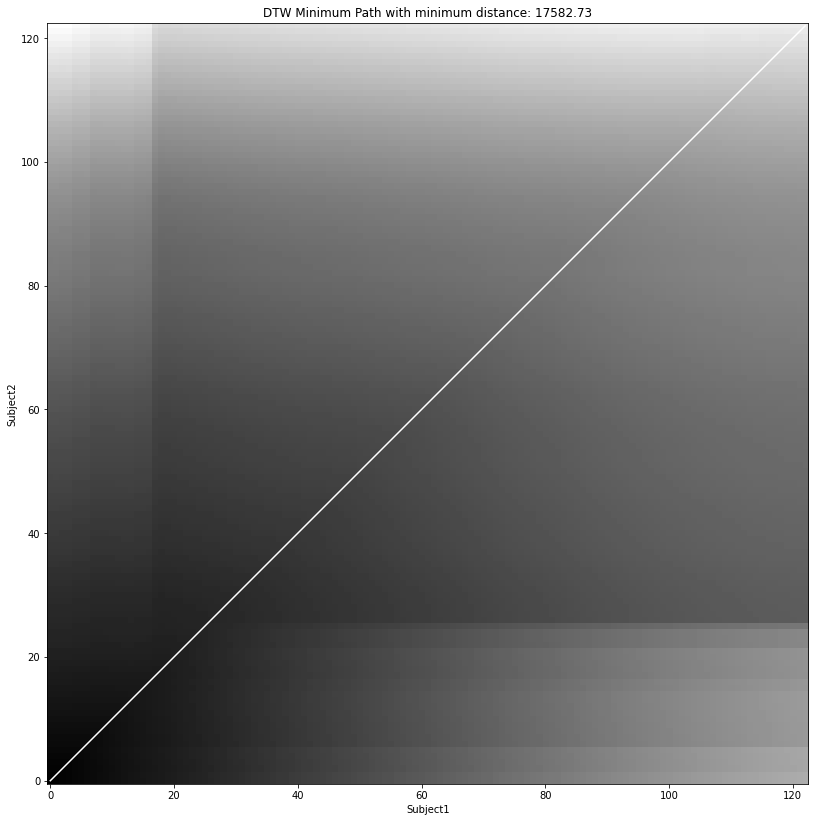

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['NO2'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

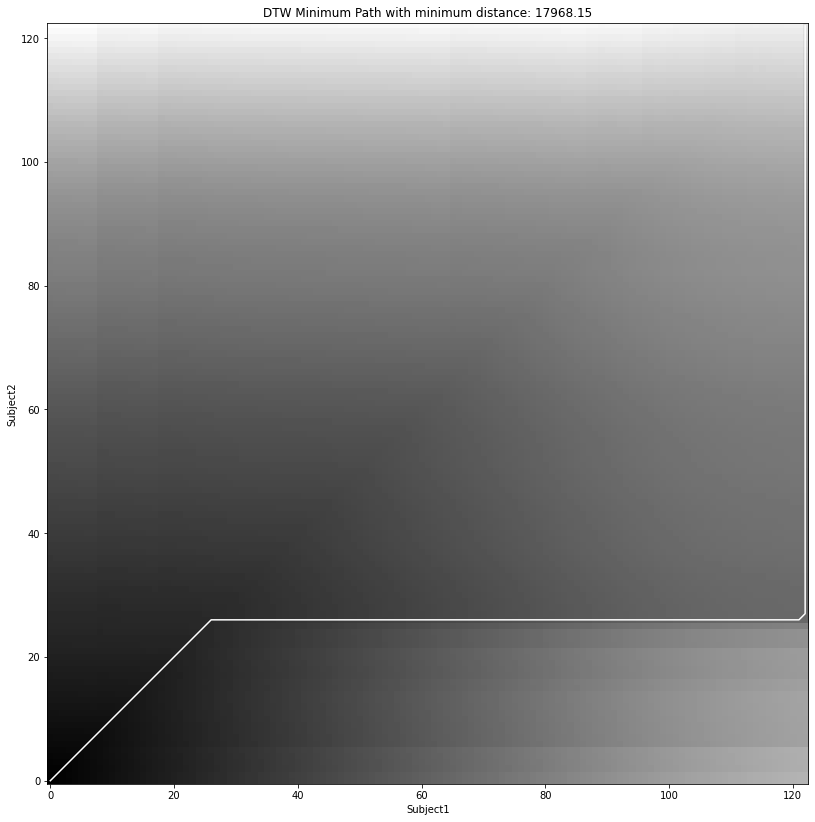

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['NO'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

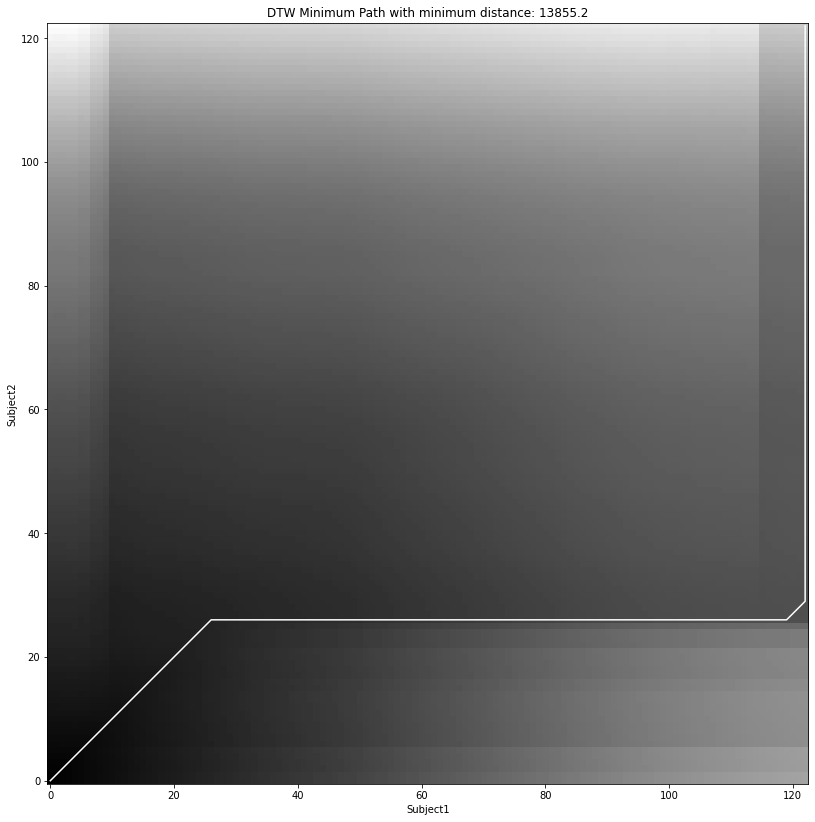

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['NOx'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

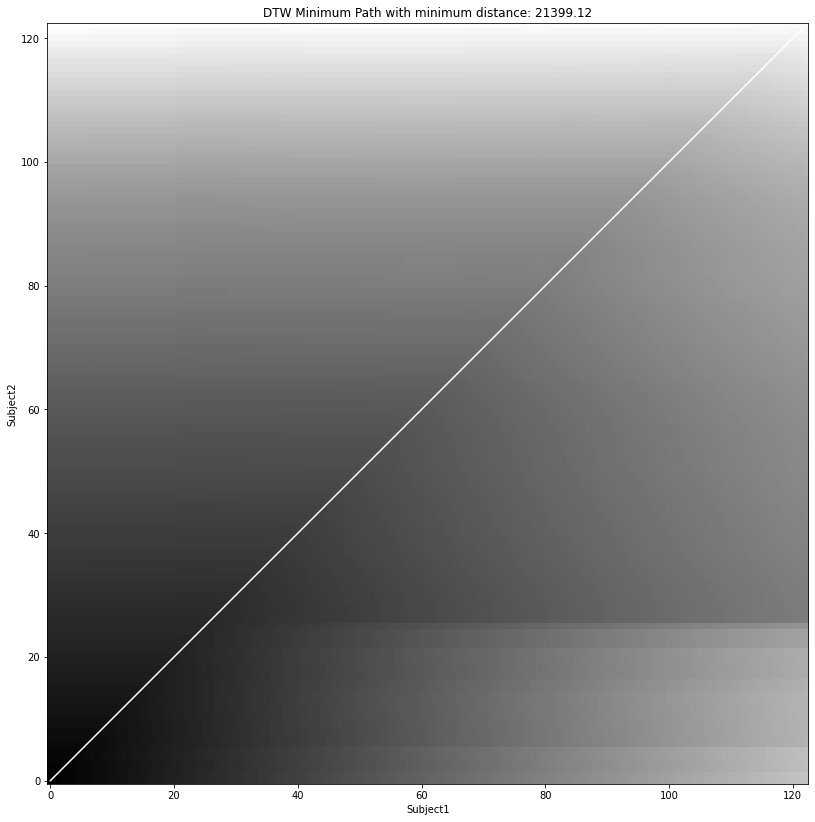

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_delhi_monsoon_avg['SO2'].interpolate().values
d2 = data_delhi_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

In [ ]:
bl_delhi=data_delhi[:"2020-03-24"]
al_delhi=data_delhi["2020-03-25":]

In [ ]:
bl_delhi

PM2.5    PM10     NO    NO2  ...     CO    SO2     O3    AQI
Date                                      ...                            
2015-01-01  313.22  607.98  69.16  36.39  ...  15.20   9.25  41.68  472.0
2015-01-02  186.18  269.55  62.09  32.87  ...   9.54   6.65  29.97  454.0
2015-01-03   87.18  131.90  25.73  30.31  ...  10.61   2.65  19.71  143.0
2015-01-04  151.84  241.84  25.01  36.91  ...  11.54   4.63  25.36  319.0
2015-01-05  146.60  219.13  14.01  34.92  ...   9.20   3.33  23.20  325.0
...            ...     ...    ...    ...  ...    ...    ...    ...    ...
2020-03-20   90.31  200.79  30.21  51.26  ...   1.24  19.71  48.23  209.0
2020-03-21   82.39  184.81  31.58  46.04  ...   1.18  18.55  43.19  205.0
2020-03-22   78.61  134.46  14.49  29.85  ...   0.92  16.63  47.67  198.0
2020-03-23   54.26  100.55  11.75  25.96  ...   0.78  15.17  46.48  127.0
2020-03-24   55.85  103.62  12.30  27.07  ...   0.81  15.81  38.23  124.0

[1910 rows x 10 columns]

In [ ]:
al_delhi

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                     ...                           
2020-03-25  37.87   68.03  13.09  21.11  ...  0.68  11.49  32.11   92.0
2020-03-26  45.69   75.81   9.02  16.58  ...  0.58  12.82  30.59   93.0
2020-03-27  26.89   45.48   8.34  15.32  ...  0.53  11.04  27.38   76.0
2020-03-28  21.23   34.15   9.87  17.52  ...  0.54  10.28  25.06   51.0
2020-03-29  27.59   55.75   8.74  16.60  ...  0.52  10.39  35.75   64.0
...           ...     ...    ...    ...  ...   ...    ...    ...    ...
2020-06-27  39.80  155.94  10.88  21.46  ...  0.87  10.38  18.88  112.0
2020-06-28  59.52  308.65  12.67  21.60  ...  0.94  10.70  18.05  196.0
2020-06-29  44.86  184.12  10.50  21.57  ...  0.88  11.58  26.61  233.0
2020-06-30  39.80   91.98   5.99  17.96  ...  0.84  10.51  37.29  114.0
2020-07-01  54.01  128.66   6.33  21.05  ...  0.97  11.15  29.73  101.0

[99 rows x 10 columns]

In [ ]:
shift_al_delhi=al_delhi.copy()
shift_al_delhi["shifted_1"] = shift_al_delhi["AQI"].shift(periods=1)

In [ ]:
shift_al_delhi["diff_lag"] = shift_al_delhi["AQI"] - shift_al_delhi["shifted_1"]

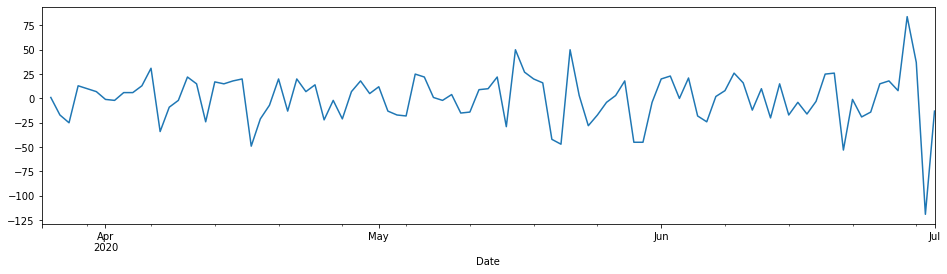

In [ ]:
shift_al_delhi["diff_lag"].plot(figsize=(16, 4));

In [ ]:
al_delhi

PM2.5    PM10     NO    NO2  ...    CO    SO2     O3    AQI
Date                                     ...                           
2020-03-25  37.87   68.03  13.09  21.11  ...  0.68  11.49  32.11   92.0
2020-03-26  45.69   75.81   9.02  16.58  ...  0.58  12.82  30.59   93.0
2020-03-27  26.89   45.48   8.34  15.32  ...  0.53  11.04  27.38   76.0
2020-03-28  21.23   34.15   9.87  17.52  ...  0.54  10.28  25.06   51.0
2020-03-29  27.59   55.75   8.74  16.60  ...  0.52  10.39  35.75   64.0
...           ...     ...    ...    ...  ...   ...    ...    ...    ...
2020-06-27  39.80  155.94  10.88  21.46  ...  0.87  10.38  18.88  112.0
2020-06-28  59.52  308.65  12.67  21.60  ...  0.94  10.70  18.05  196.0
2020-06-29  44.86  184.12  10.50  21.57  ...  0.88  11.58  26.61  233.0
2020-06-30  39.80   91.98   5.99  17.96  ...  0.84  10.51  37.29  114.0
2020-07-01  54.01  128.66   6.33  21.05  ...  0.97  11.15  29.73  101.0

[99 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


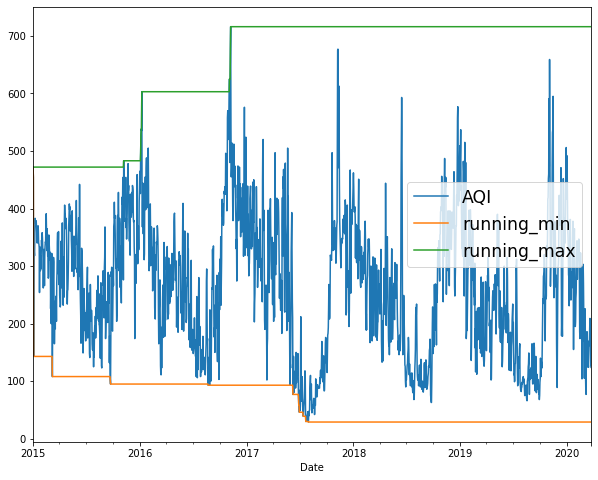

In [ ]:
bl_delhi["running_min"] = bl_delhi["AQI"].expanding().min()  # same as cummin()
bl_delhi["running_max"] = bl_delhi["AQI"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 8))

bl_delhi[["AQI", "running_min", "running_max"]].plot(ax=ax)
plt.legend(fontsize="xx-large");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


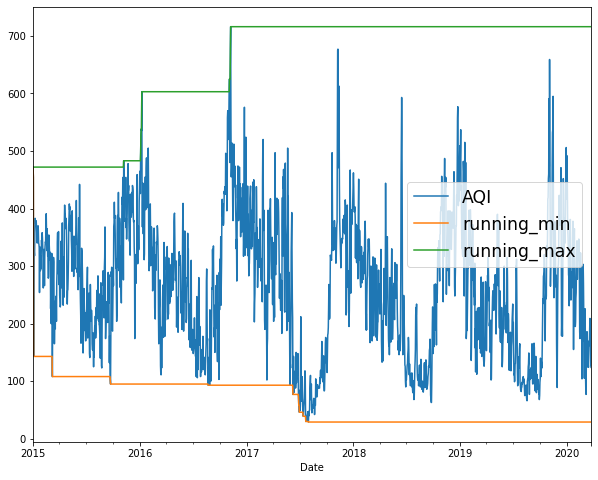

In [ ]:
al_delhi["running_min"] = al_delhi["AQI"].expanding().min()  # same as cummin()
al_delhi["running_max"] = al_delhi["AQI"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 8))

bl_delhi[["AQI", "running_min", "running_max"]].plot(ax=ax)
plt.legend(fontsize="xx-large");

In [ ]:
data1=al_delhi["AQI"].resample("7D").agg(["mean", "median", "std"])

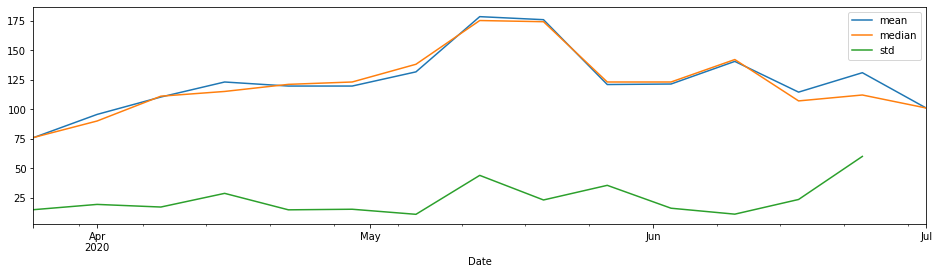

In [ ]:
data1.plot(figsize=(16, 4));

In [ ]:
bl_week=data_month=bl_delhi.resample("7D").mean()
al_week=data_month=al_delhi.resample("7D").mean()


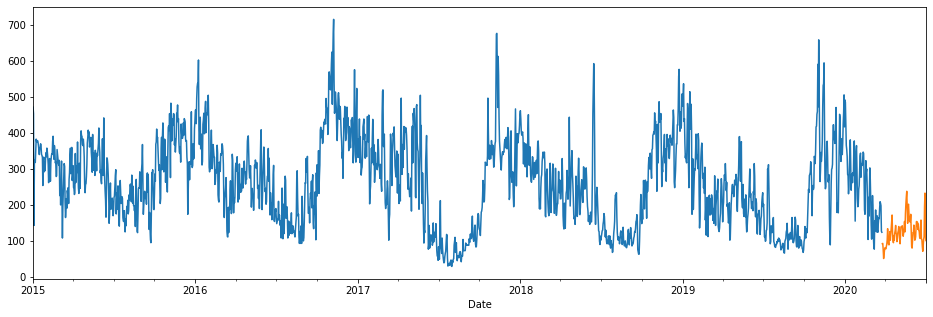

In [ ]:
bl_delhi["AQI"].plot(figsize=(16, 5))
al_delhi["AQI"].plot()

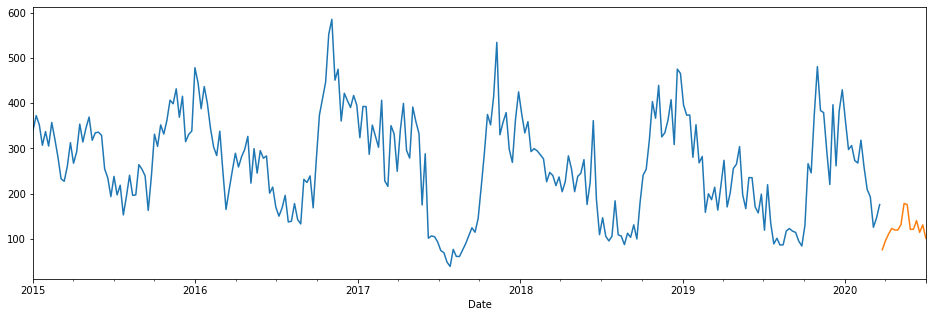

In [ ]:
bl_week["AQI"].plot(figsize=(16, 5))
al_week["AQI"].plot()

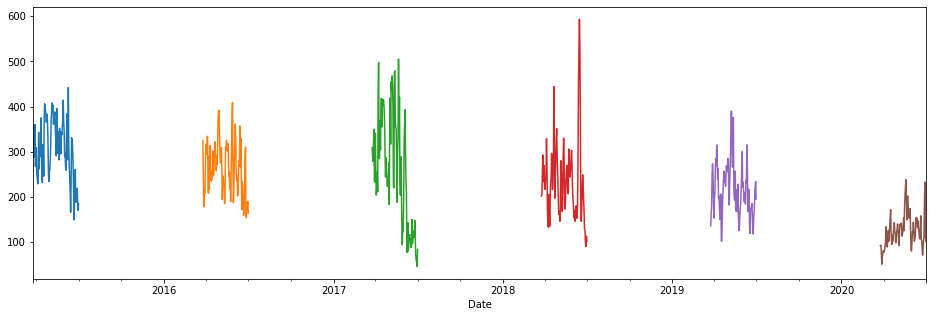

In [ ]:
bl_delhi["2015-03-25":"2015-07-01"]["AQI"].plot(figsize=(16, 5))
bl_delhi["2016-03-25":"2016-07-01"]["AQI"].plot()
bl_delhi["2017-03-25":"2017-07-01"]["AQI"].plot()
bl_delhi["2018-03-25":"2018-07-01"]["AQI"].plot()
bl_delhi["2019-03-25":"2019-07-01"]["AQI"].plot()

al_delhi["AQI"].plot()

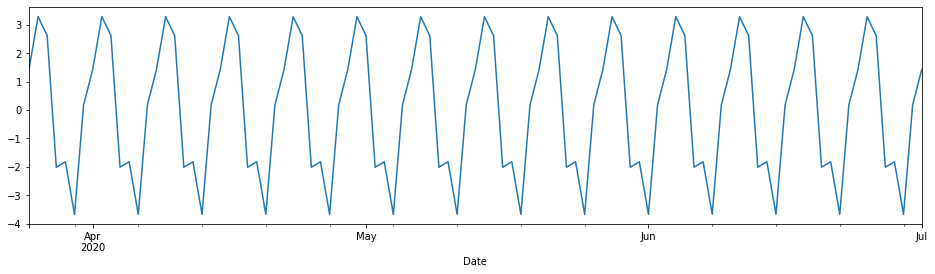

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(al_delhi["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

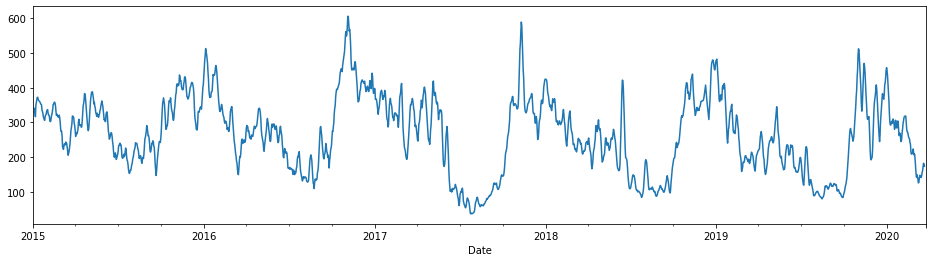

In [ ]:
decomposition = sm.tsa.seasonal_decompose(bl_delhi["AQI"].dropna())

decomposition.trend.plot();

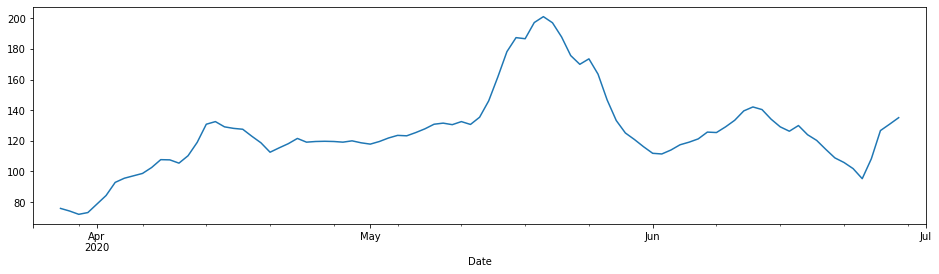

In [ ]:
decomposition = sm.tsa.seasonal_decompose(al_delhi["AQI"].dropna())

decomposition.trend.plot();

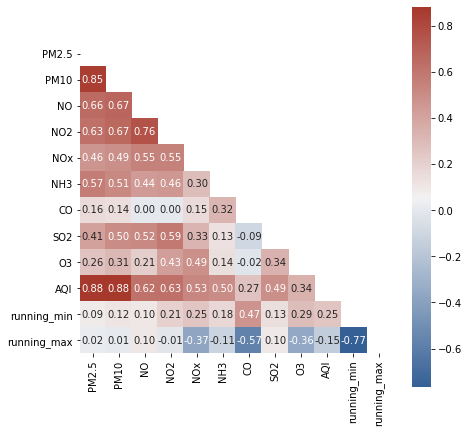

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = bl_delhi.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

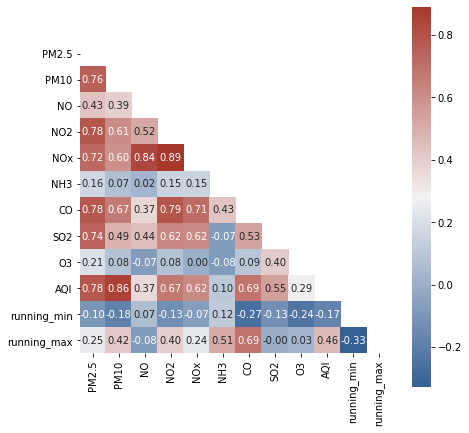

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = al_delhi.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


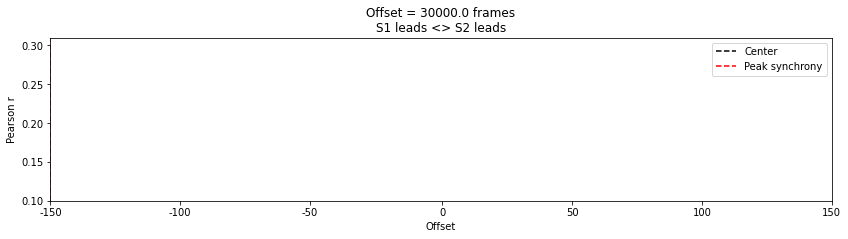

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['NO2']
d2 = al_delhi['AQI']
seconds = 1000
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


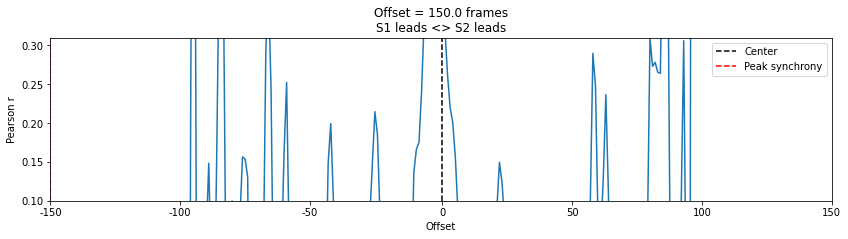

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['PM2.5']
d2 = al_delhi['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


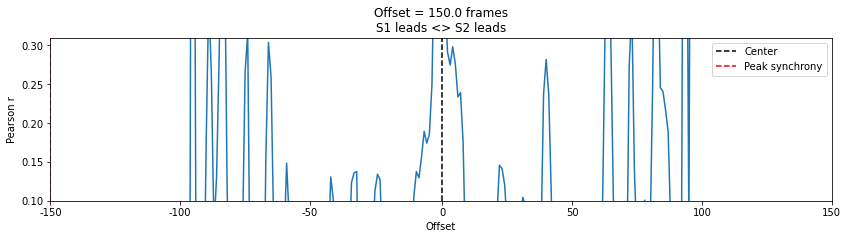

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['PM10']
d2 = al_delhi['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


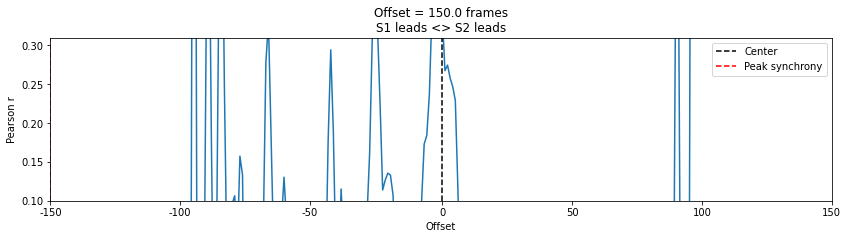

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['SO2']
d2 = al_delhi['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


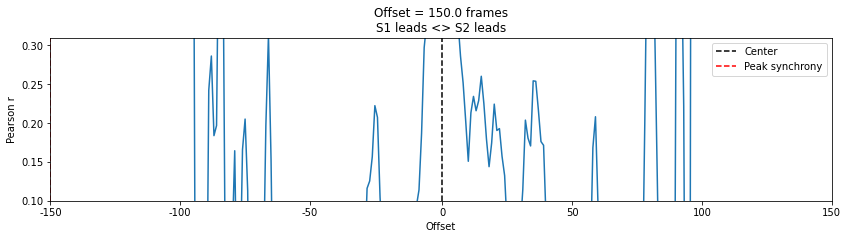

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_delhi['CO']
d2 = al_delhi['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

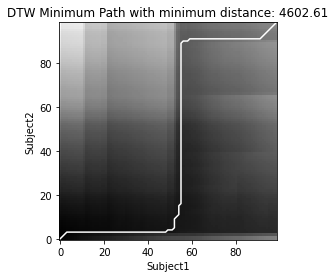

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['PM2.5'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

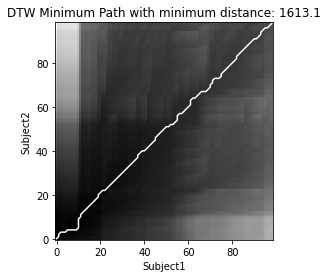

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['PM10'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

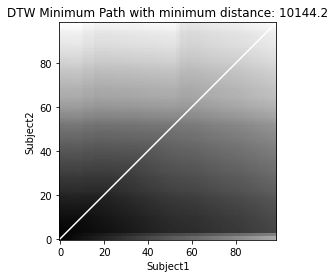

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['NO2'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

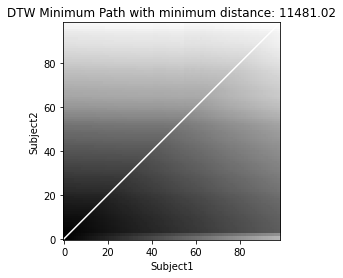

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['NO'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

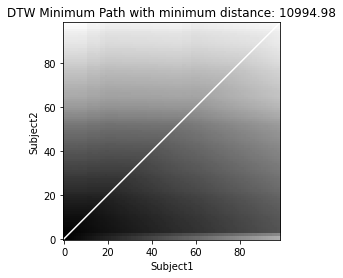

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['SO2'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

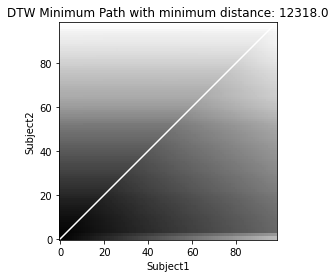

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['CO'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

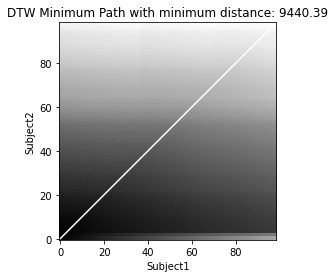

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_delhi['NH3'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

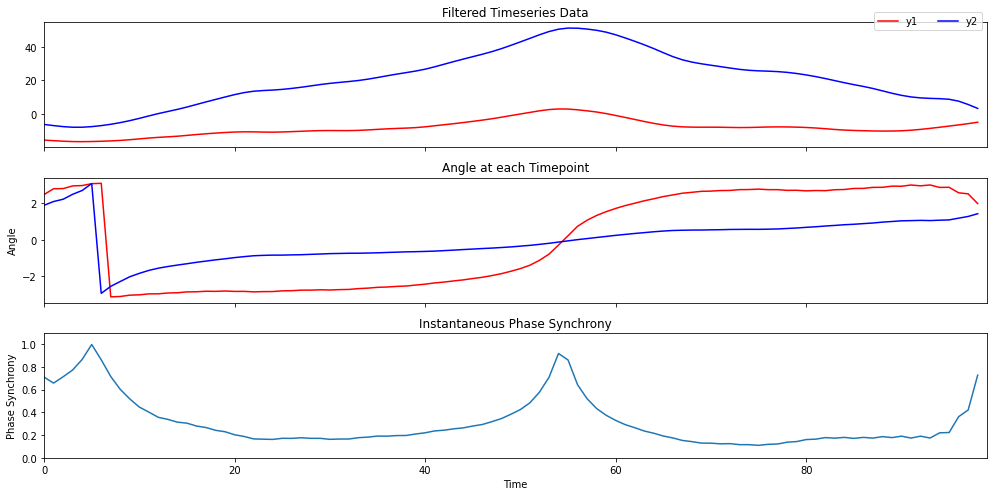

In [ ]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['PM2.5'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

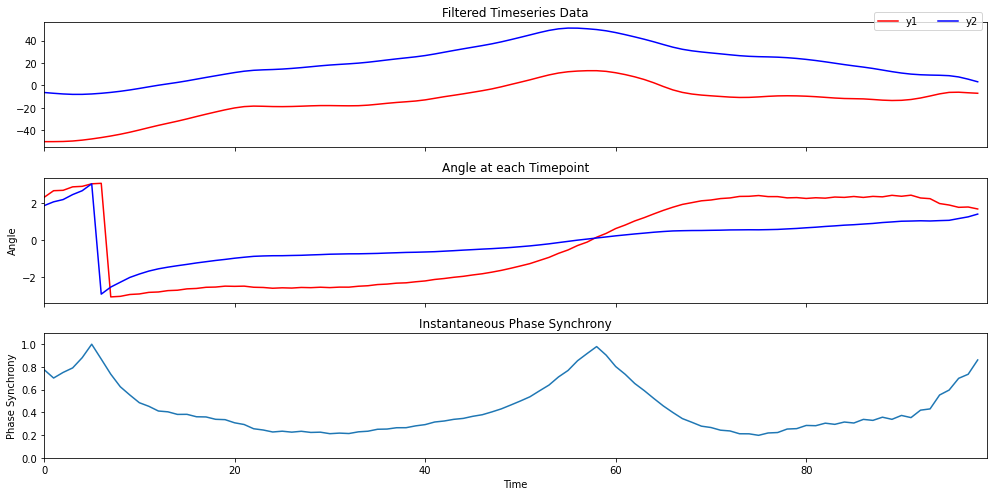

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['PM10'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

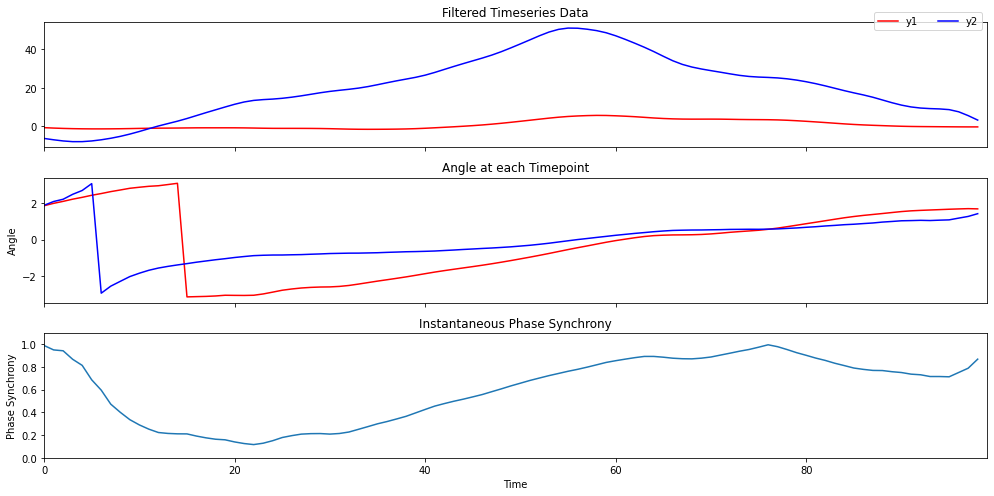

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['NO2'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

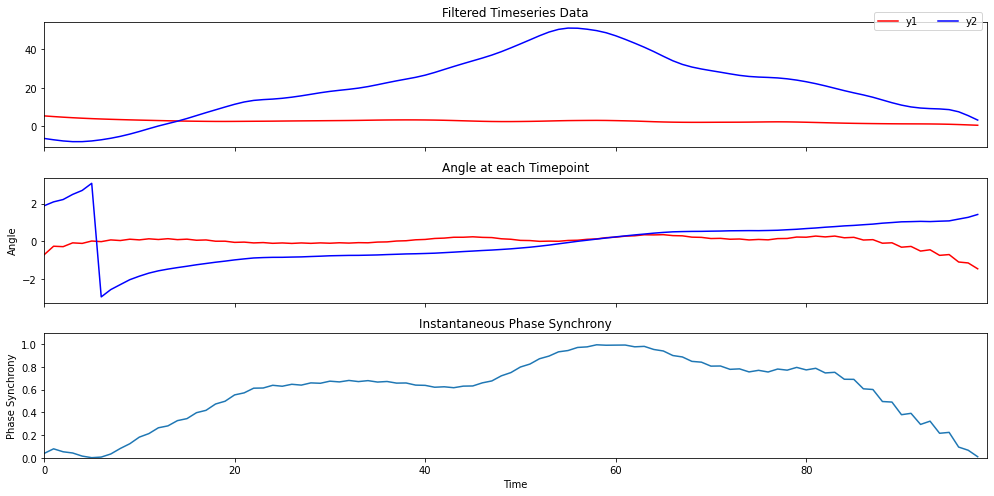

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['NO'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

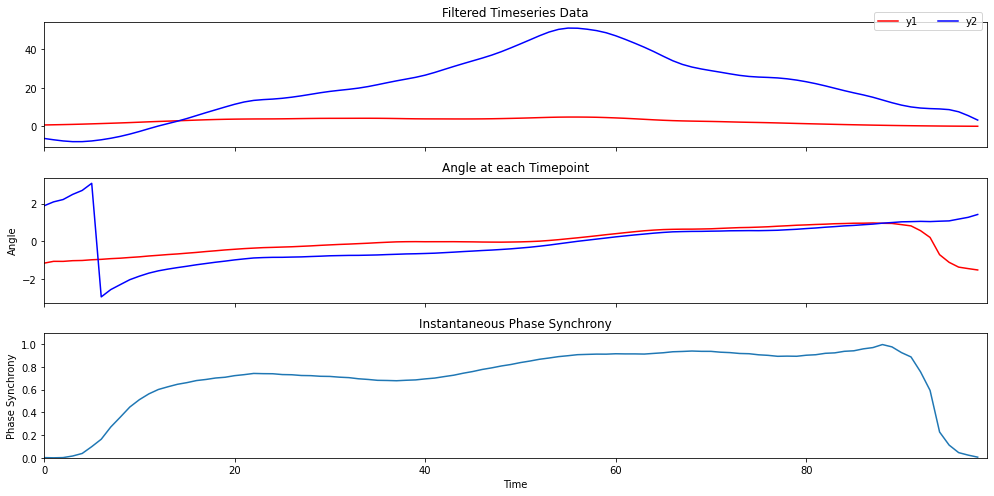

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['SO2'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

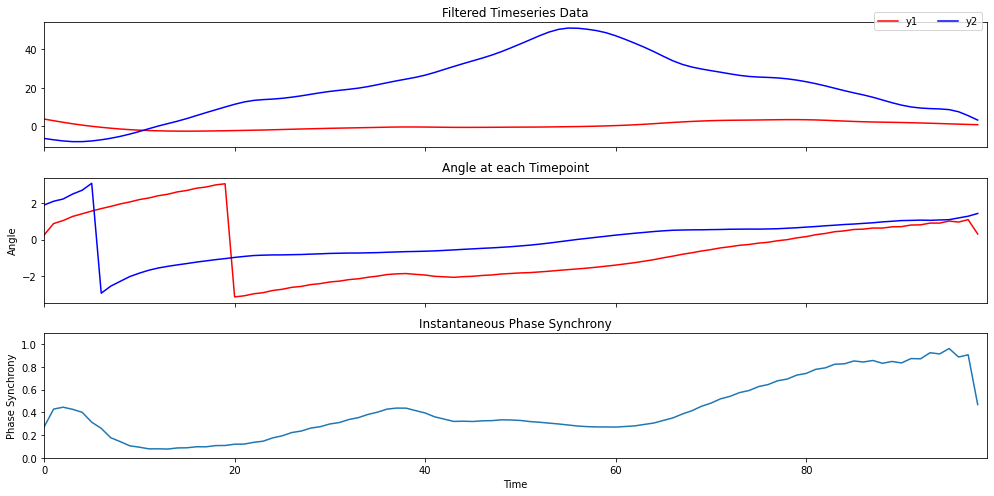

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['NH3'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

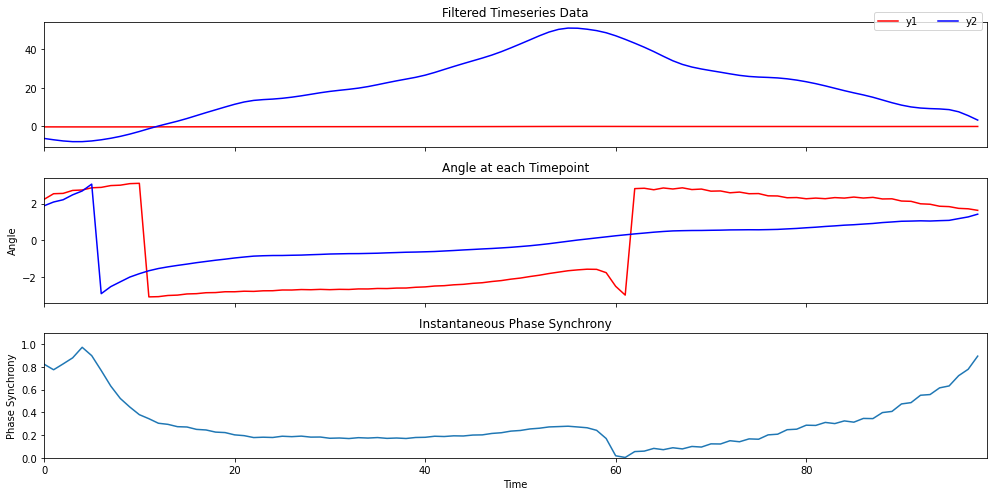

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_delhi['CO'].interpolate().values
d2 = al_delhi['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

In [ ]:
# # Windowed time lagged cross correlation
# seconds = 5
# fps = 30
# no_splits = 20
# samples_per_split = al_delhi.shape[0]/no_splits
# rss=[]
# for t in range(0, no_splits):
#     d1 = al_delhi['PM2.5'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     d2 = al_delhi['AQI'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
# rss = pd.DataFrame(rss)
# f,ax = plt.subplots(figsize=(10,5))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# # Rolling window time lagged cross correlation
# seconds = 5
# fps = 30
# window_size = 300 #samples
# t_start = 0
# t_end = t_start + window_size
# step_size = 30
# rss=[]
# while t_end < 5400:
#     d1 = al_delhi['PM2.5'].iloc[t_start:t_end]
#     d2 = al_delhi['AQI'].iloc[t_start:t_end]
#     rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
#     t_start = t_start + step_size
#     t_end = t_end + step_size
# rss = pd.DataFrame(rss)

# f,ax = plt.subplots(figsize=(10,10))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

TypeError: ignored

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data_delhi['AQI'])

In [ ]:
data_week=data_delhi.resample("7D").mean()

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_week['AQI'])

ADF Test Statistic : -4.835566413537756
p-value : 4.647667864810488e-05
#Lags Used : 9
Number of Observations : 277
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_week['AQI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.AQI   No. Observations:                  286
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1571.846
Method:                       css-mle   S.D. of innovations             58.960
Date:                Wed, 15 Sep 2021   AIC                           3151.693
Time:                        13:02:47   BIC                           3166.316
Sample:                    01-08-2015   HQIC                          3157.554
                         - 06-25-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7643      2.458     -0.311      0.756      -5.582       4.053
ar.L1.D.AQI    -0.0097      0.150     -0.065      0.948      -0.303       0.284
ma.L1.D.AQI    -0.2892      0.138     -2.096      0.037      -0.560      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -103.2509           +0.0000j          103.2509            0.5000
MA.1            3.4576           +0.0000j            3.4576            0.0000
-----------------------------------------------------------------------------
"""

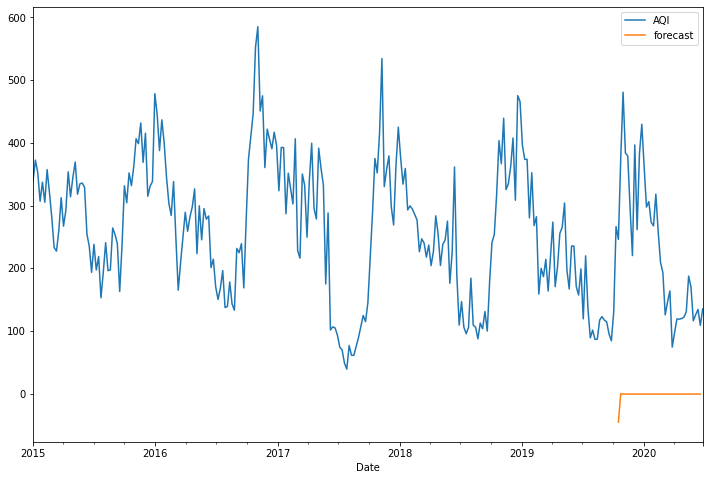

In [ ]:
data_week['forecast']=model_fit.predict(start=250,end=285,dynamic=True)
data_week[['AQI','forecast']].plot(figsize=(12,8))

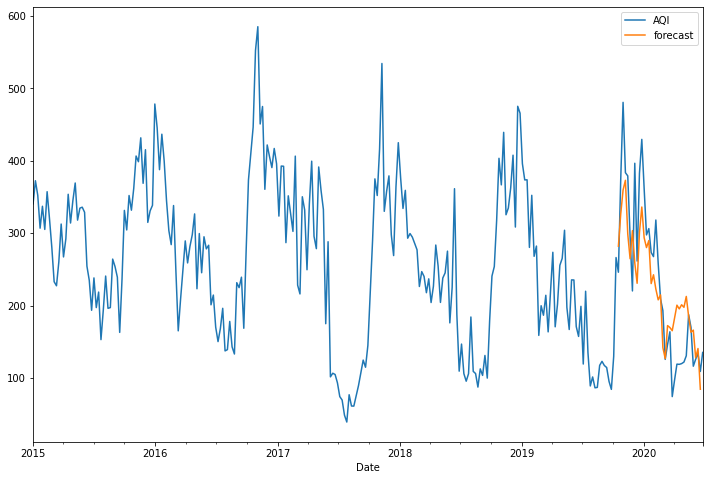

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_week['AQI'],order=(1, 1, 1),seasonal_order=(1,1,1,52))
results=model.fit()
data_week['forecast']=results.predict(start=250,end=285,dynamic=True)
data_week[['AQI','forecast']].plot(figsize=(12,8))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


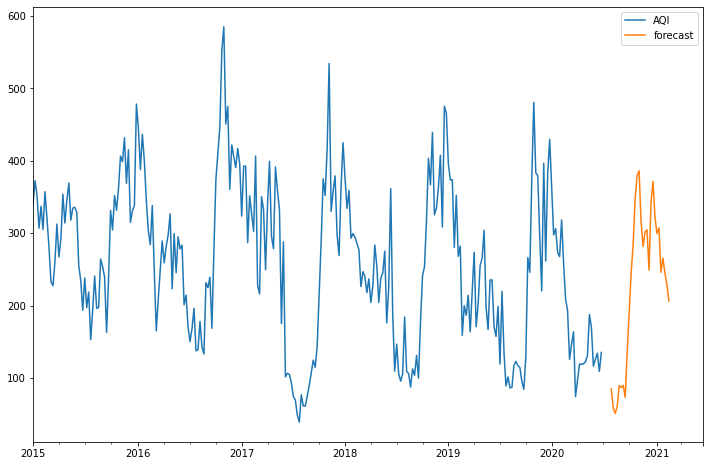

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[data_week.index[-1]+ DateOffset(weeks=x)for x in range(0,52)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_week.columns)

future_datest_df.tail()

future_df=pd.concat([data_week,future_datest_df])

future_df['forecast'] = results.predict(start = 291, end = 320, dynamic= True)
future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

In [ ]:
data_month=data_delhi.resample("M").mean()

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_month['AQI'])

ADF Test Statistic : 0.22170186768419853
p-value : 0.9734528532104986
#Lags Used : 11
Number of Observations : 55
weak evidence against null hypothesis,indicating it is non-stationary 


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_month['AQI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.AQI   No. Observations:                   66
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -373.579
Method:                       css-mle   S.D. of innovations             68.201
Date:                Wed, 15 Sep 2021   AIC                            755.158
Time:                        13:03:27   BIC                            763.917
Sample:                    02-28-2015   HQIC                           758.619
                         - 07-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.2042      1.352     -1.631      0.108      -4.853       0.445
ar.L1.D.AQI     0.7121      0.092      7.782      0.000       0.533       0.891
ma.L1.D.AQI    -1.0000      0.038    -26.484      0.000      -1.074      -0.926
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4043           +0.0000j            1.4043            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

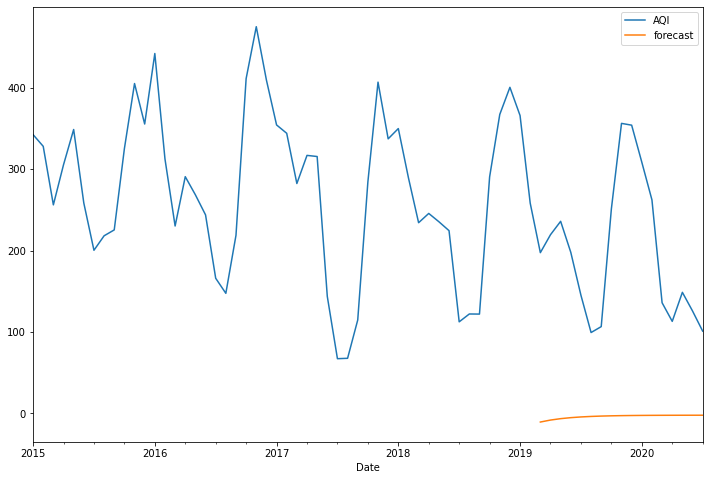

In [ ]:
data_month['forecast']=model_fit.predict(start=50,end=66,dynamic=True)
data_month[['AQI','forecast']].plot(figsize=(12,8))

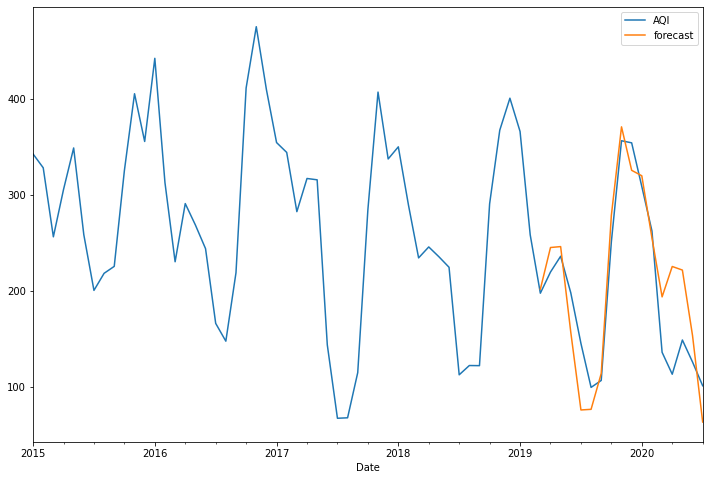

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_month['AQI'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data_month['forecast']=results.predict(start=50,end=66,dynamic=True)
data_month[['AQI','forecast']].plot(figsize=(12,8))

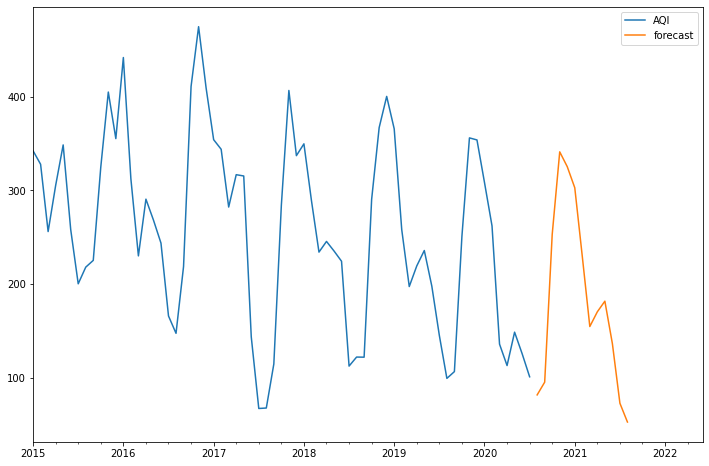

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[data_month.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_month.columns)

future_datest_df.tail()

future_df=pd.concat([data_month,future_datest_df])

future_df['forecast'] = results.predict(start = 67, end = 79, dynamic= True)
future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df["2020-08-01":"2021-08-01"]["forecast"]

2020-08-31     81.660664
2020-09-30     95.245265
2020-10-31    252.977320
2020-11-30    341.186362
2020-12-31    325.363625
2021-01-31    302.834156
2021-02-28    229.486211
2021-03-31    154.677324
2021-04-30    170.409317
2021-05-31    181.743443
2021-06-30    136.352359
2021-07-31     72.732033
Name: forecast, dtype: float64

In [ ]:
data_month["2019-08-01":"2020-08-01"]["AQI"]

Date
2019-08-31     99.290323
2019-09-30    106.533333
2019-10-31    251.000000
2019-11-30    356.100000
2019-12-31    353.903226
2020-01-31    308.451613
2020-02-29    262.137931
2020-03-31    135.838710
2020-04-30    113.000000
2020-05-31    148.645161
2020-06-30    125.733333
2020-07-31    101.000000
Freq: M, Name: AQI, dtype: float64

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_delhi['AQI'])

ADF Test Statistic : -3.432900787202573
p-value : 0.00988713035480299
#Lags Used : 17
Number of Observations : 1991
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_delhi['AQI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.AQI   No. Observations:                 2008
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10722.678
Method:                       css-mle   S.D. of innovations             50.447
Date:                Wed, 15 Sep 2021   AIC                          21453.357
Time:                        13:03:30   BIC                          21475.776
Sample:                    01-02-2015   HQIC                         21461.587
                         - 07-01-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1277      0.323     -0.396      0.692      -0.760       0.505
ar.L1.D.AQI     0.6852      0.024     28.818      0.000       0.639       0.732
ma.L1.D.AQI    -0.9101      0.012    -73.942      0.000      -0.934      -0.886
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4594           +0.0000j            1.4594            0.0000
MA.1            1.0988           +0.0000j            1.0988            0.0000
-----------------------------------------------------------------------------
"""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


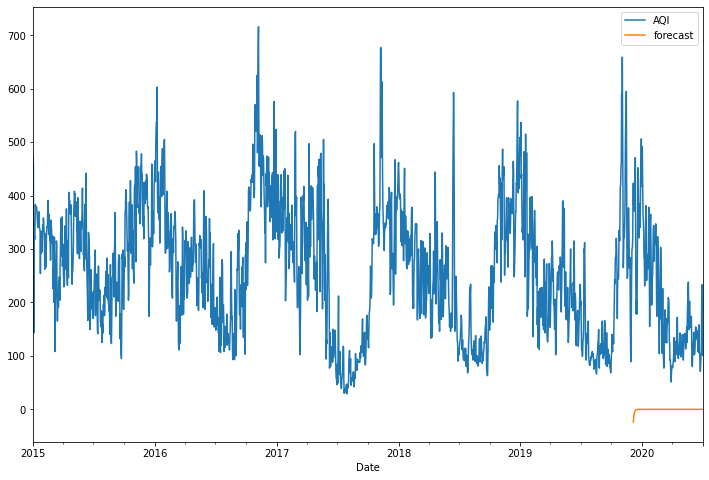

In [ ]:
data_delhi['forecast']=model_fit.predict(start=1800,end=2009,dynamic=True)
data_delhi[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
# import statsmodels.api as sm
# model=sm.tsa.statespace.SARIMAX(data_delhi['AQI'],order=(1, 1, 1),seasonal_order=(1,1,1,365))
# results=model.fit()
# data_delhi['forecast']=results.predict(start=1800,end=2009,dynamic=True)
# data_delhi[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
# from pandas.tseries.offsets import DateOffset
# future_dates=[data_delhi.index[-1]+ DateOffset(days=x)for x in range(0,200)]
# future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_month.columns)

# future_datest_df.tail()

# future_df=pd.concat([data_delhi,future_datest_df])

# future_df['forecast'] = results.predict(start = 2010, end = 2210, dynamic= True)
# future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

In [ ]:

# !pip install kats

In [ ]:
# from kats.models.prophet import ProphetModel, ProphetParams

# # Specify parameters
# params = ProphetParams(seasonality_mode="multiplicative")

# # Create a model instance
# m = ProphetModel(data_week, params)

# # Fit mode
# m.fit()

# # Forecast
# fcst = m.predict(steps=30, freq="MS")
# fcst

In [ ]:
!pip install pycaret


     |████████████████████████████████| 264 kB 5.1 MB/s 
     |████████████████████████████████| 111 kB 49.6 MB/s 
     |████████████████████████████████| 1.7 MB 39.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 38.1 MB/s 
     |████████████████████████████████| 14.6 MB 109 kB/s 
     |████████████████████████████████| 248 kB 43.8 MB/s 
     |████████████████████████████████| 6.8 MB 41.0 MB/s 
     |████████████████████████████████| 80 kB 7.1 MB/s 
     |████████████████████████████████| 167 kB 48.4 MB/s 
     |████████████████████████████████| 271 kB 36.9 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 1.3 MB 67.9 MB/s 
     |████████████████████████████████| 102 kB 64.4 MB/s 
     |████████████████████████████████| 675 kB 69.2 MB/s 
     |██████████████████

In [ ]:
# import the regression module
from pycaret.regression import *
# initialize setup
s = setup(data = train, test_data = test, target = 'Passengers', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)

NameError: ignored

In [ ]:
data=pd.read_csv("city_day.csv")

data_pred=data.loc[data['City']=='Delhi']

In [ ]:
data_pred.drop(["Benzene", "Toluene", "Xylene", "AQI_Bucket", "City"], axis=1, inplace=True)
data_pred["Date"] = pd.to_datetime(data_pred["Date"], format="%Y-%m-%d", errors="coerce")
assert data_pred["Date"].dtype == "datetime64[ns]"

In [ ]:
data_pred=data_pred.reset_index()
data_pred

In [ ]:
# data_pred["Date"]=data_pred["Date"].resample("M").mean()

In [ ]:
# extract month and year from dates
data_pred['Month'] = [i.month for i in data_pred['Date']]
data_pred['Year'] = [i.year for i in data_pred['Date']]
# create a sequence of numbers
data_pred['Series'] = np.arange(1,len(data)+1)
# drop unnecessary columns and re-arrange
data_pred.drop(['Date', 'MA12'], axis=1, inplace=True)
data = data[['Series', 'Year', 'Month', 'Passengers']] 
# check the head of the dataset
data.head()